In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional, Union
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
    ForexPctChange,
    ForexQuickLook,
)

from features import (
    ForexTSIndicators,
    ForexCustomIndicators,
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSignals,
    ForexRSISignals
)

import warnings
warnings.filterwarnings('ignore')


data = ForexDataLoad(file_path = '../data/xauaud.csv').data
ohlcv_data = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data, fast_clean = True)
data = cleaner.data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile 

In [3]:
momentum_data = ForexMomentumIndicators(data = data).generate_all_momentum_indicators(
    stochastic_periods = [[14, 3, 3], [28, 6, 6]],
    rsi_periods = [[14, 21, 28], [9, 16, 18]],
    williams_periods = [[14, 21, 28], [9, 16, 18]],
    momentum_periods = [[14, 21, 28], [9, 16, 18], [10, 14, 20]],
    cci_periods = [[14, 21, 28], [9, 16, 18]],
)

MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 generate_all_momentum_indicators
Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   close                38216 non-null  float64
 1   rsi_14               38202 non-null  float64
 2   rsi_14_slope         38201 non-null  float64
 3   rsi_21               38195 non-null  float64
 4   rsi_21_slope         38194 non-null  float64
 5   rsi_28               38188 non-null  float64
 6   rsi_28_slope         38187 non-null  float64
 7   rsi_9                38207 non-null  float64
 8   rsi_9_slope          38206 non-null  float64
 9   rsi_16               38200 non-null  float64
 10  rsi_16_slope         38199 non-null  float64
 11  rsi_18               38198 non-null  floa

In [4]:
rsi_signals = ForexRSISignals(
    data = momentum_data[0], 
    parameters = momentum_data[1]['rsi_paramas']
)

RSI SIGNAL GENERATION
Available functions: 
1 rsi_overbought_oversold_signals 
2 rsi_centerline_signals 
3 rsi_divergence_signals 
4 rsi_momentum_signals 
5 rsi_failure_swing_signals 
6 rsi_trend_reversal_signals 
7 generate_all_rsi_signals


In [5]:
momentum_signals_data = rsi_signals.generate_all_rsi_signals()

Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   close                  38216 non-null  float64
 1   rsi_14_overbought      38216 non-null  int64  
 2   rsi_21_overbought      38216 non-null  int64  
 3   rsi_28_overbought      38216 non-null  int64  
 4   rsi_9_overbought       38216 non-null  int64  
 5   rsi_16_overbought      38216 non-null  int64  
 6   rsi_18_overbought      38216 non-null  int64  
 7   rsi_14_centerline      38216 non-null  int64  
 8   rsi_21_centerline      38216 non-null  int64  
 9   rsi_28_centerline      38216 non-null  int64  
 10  rsi_9_centerline       38216 non-null  int64  
 11  rsi_16_centerline      38216 non-null  int64  
 12  rsi_18_centerline      38216 non-null  int64  
 13  rsi_14_divergence      38216 non-null  int64  
 14  rsi_21_di

In [6]:
signals1 = momentum_signals_data.filter(regex = 'centerline|close').columns
signals2 = momentum_signals_data.filter(regex = 'divergence|close').columns
signals3 = momentum_signals_data.filter(regex = 'slope_momentum|close').columns
signals4 = momentum_signals_data.filter(regex = 'swing_fail|close').columns
signals5 = momentum_signals_data.filter(regex = 'reversal|close').columns
signals6 = momentum_signals_data.filter(regex = 'overbought|close').columns

signal_cols = [signals1, signals2, signals3, signals4, signals5, signals6]

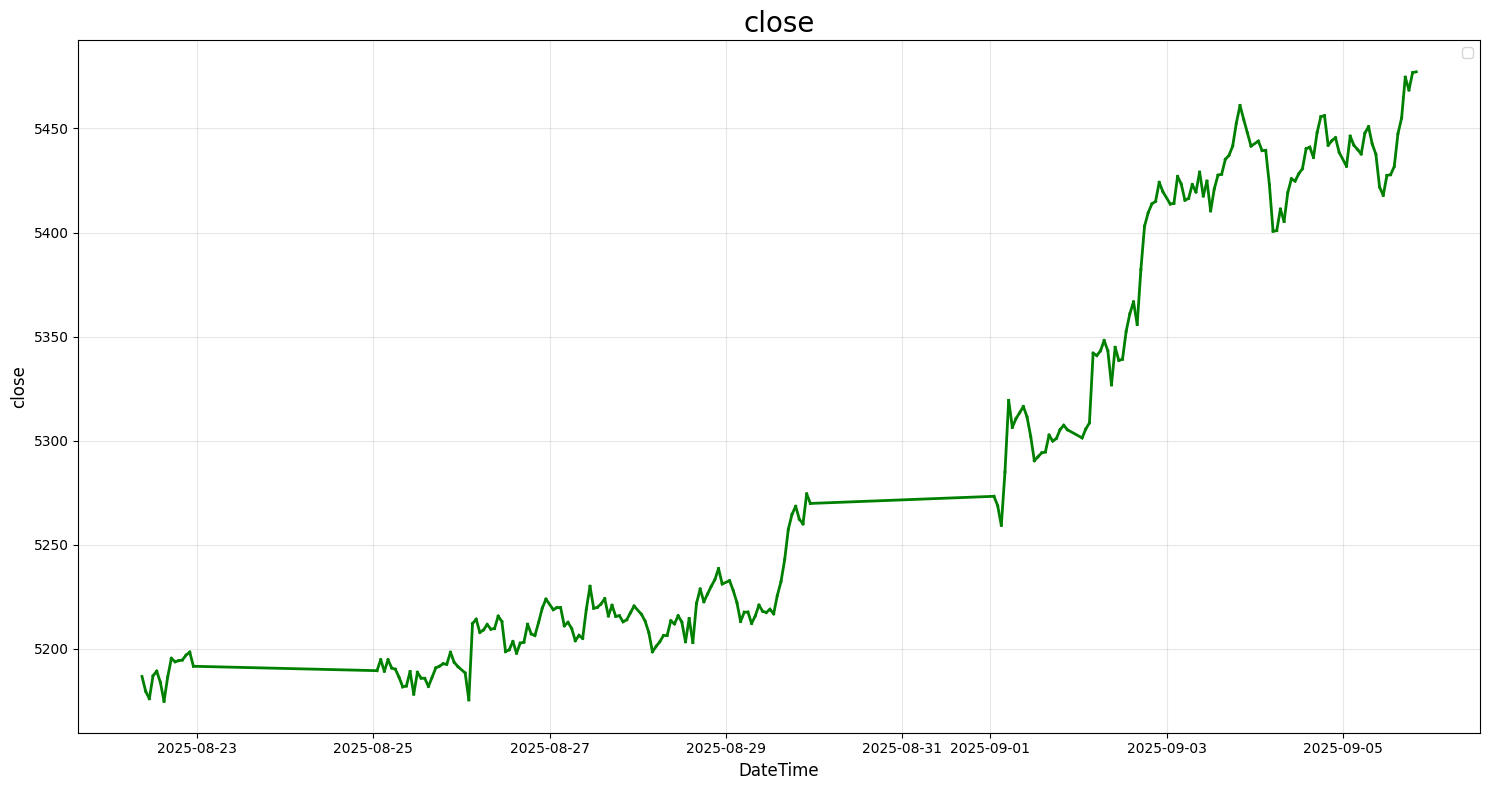

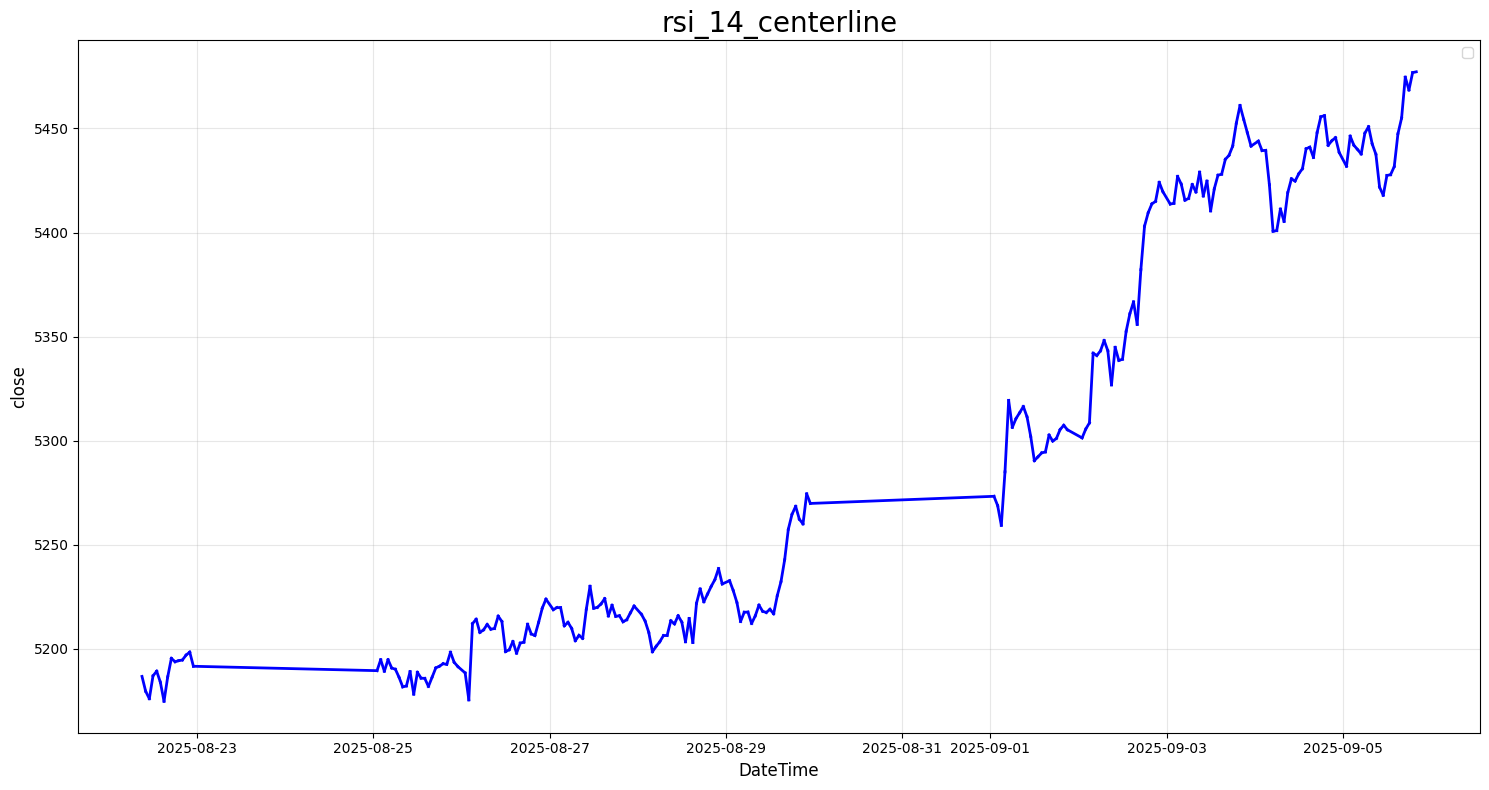

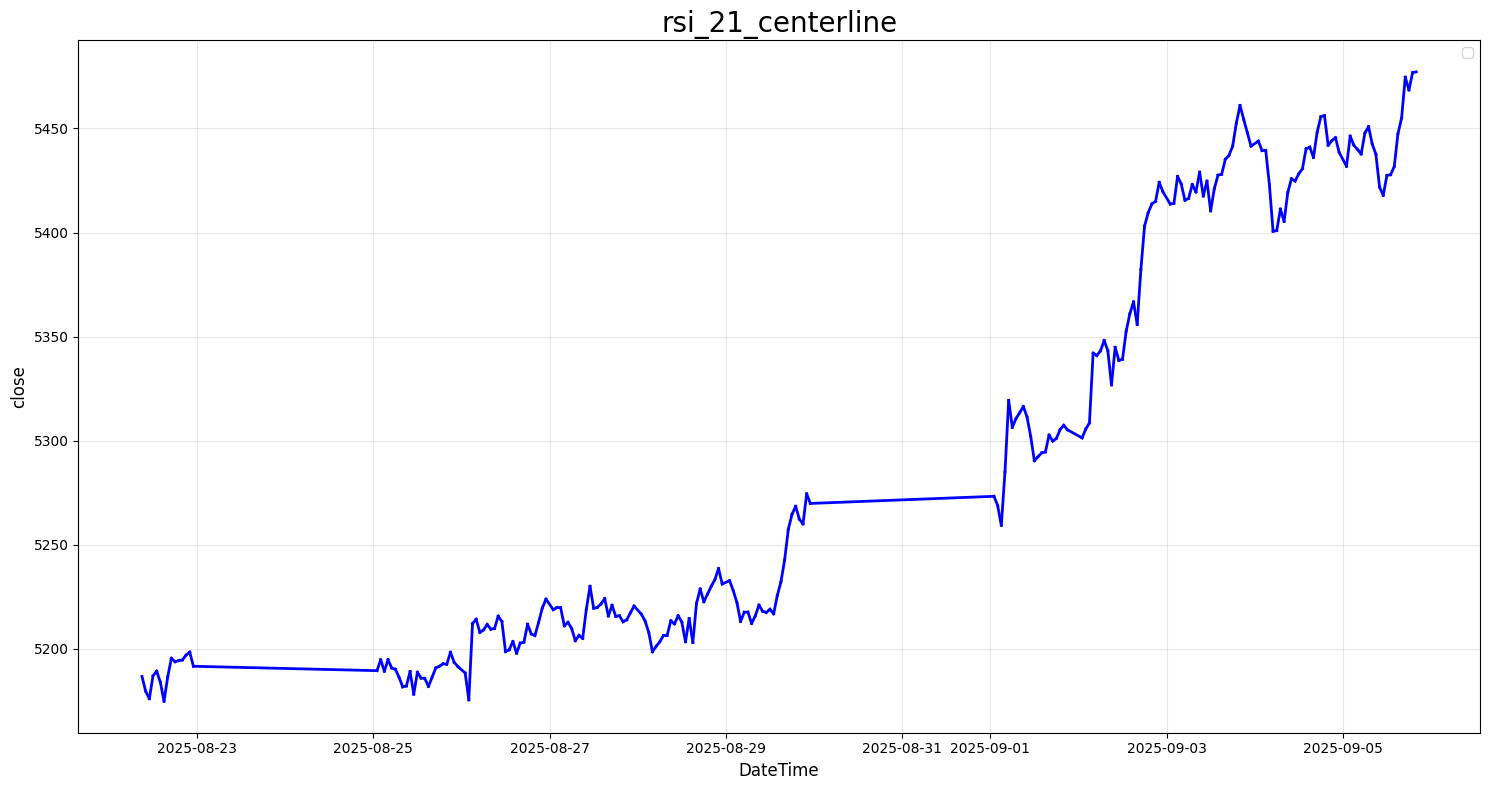

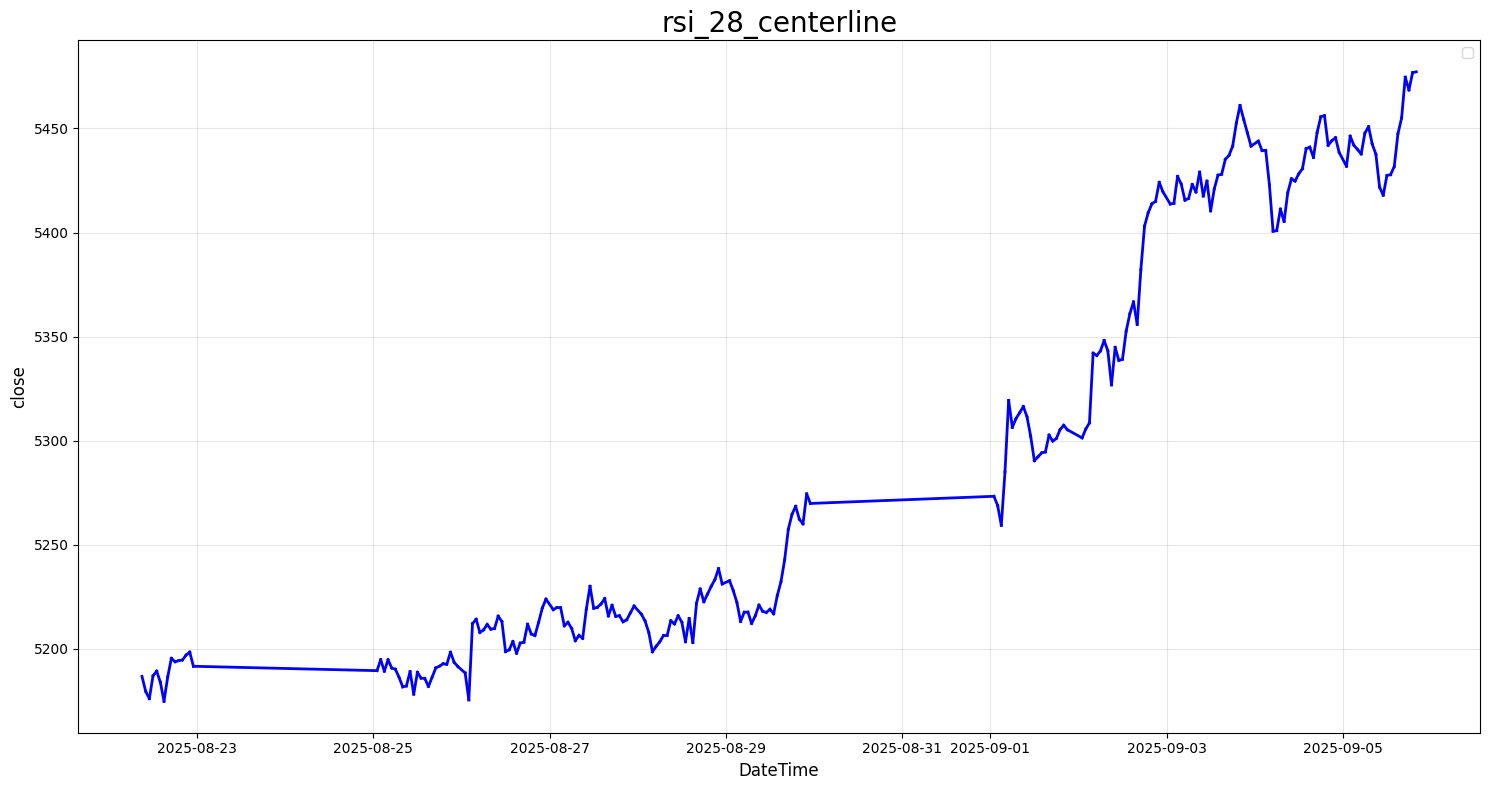

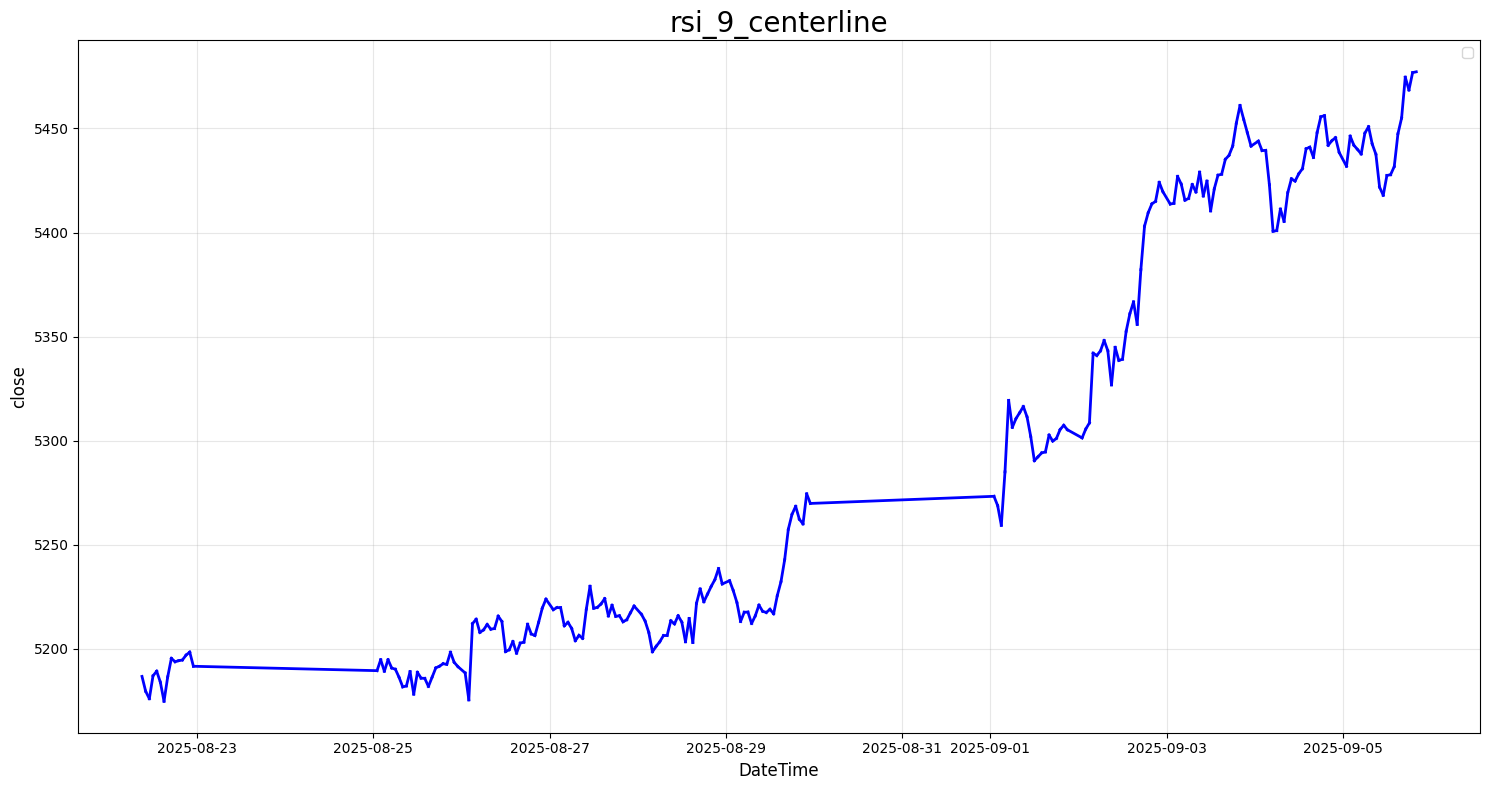

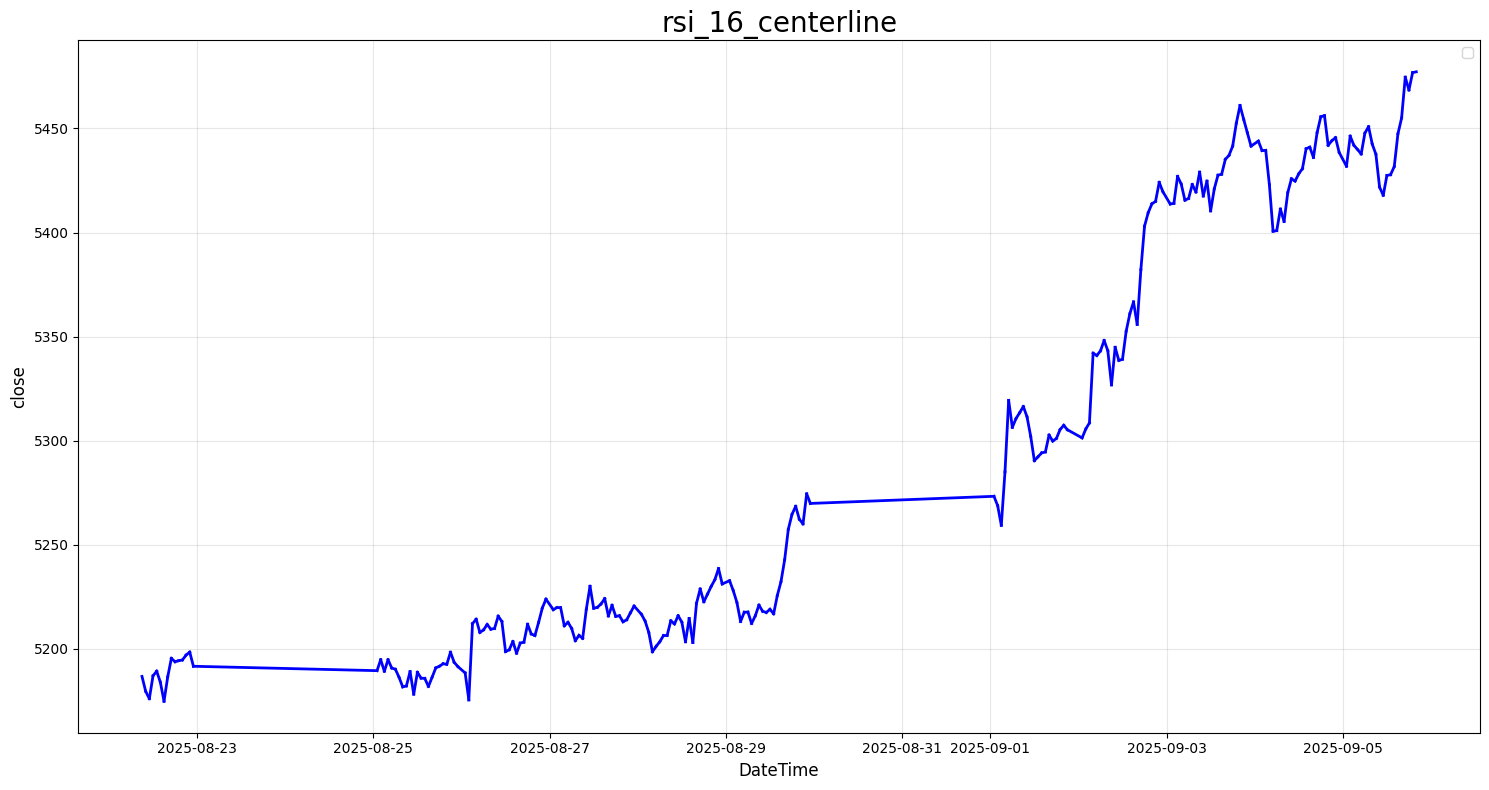

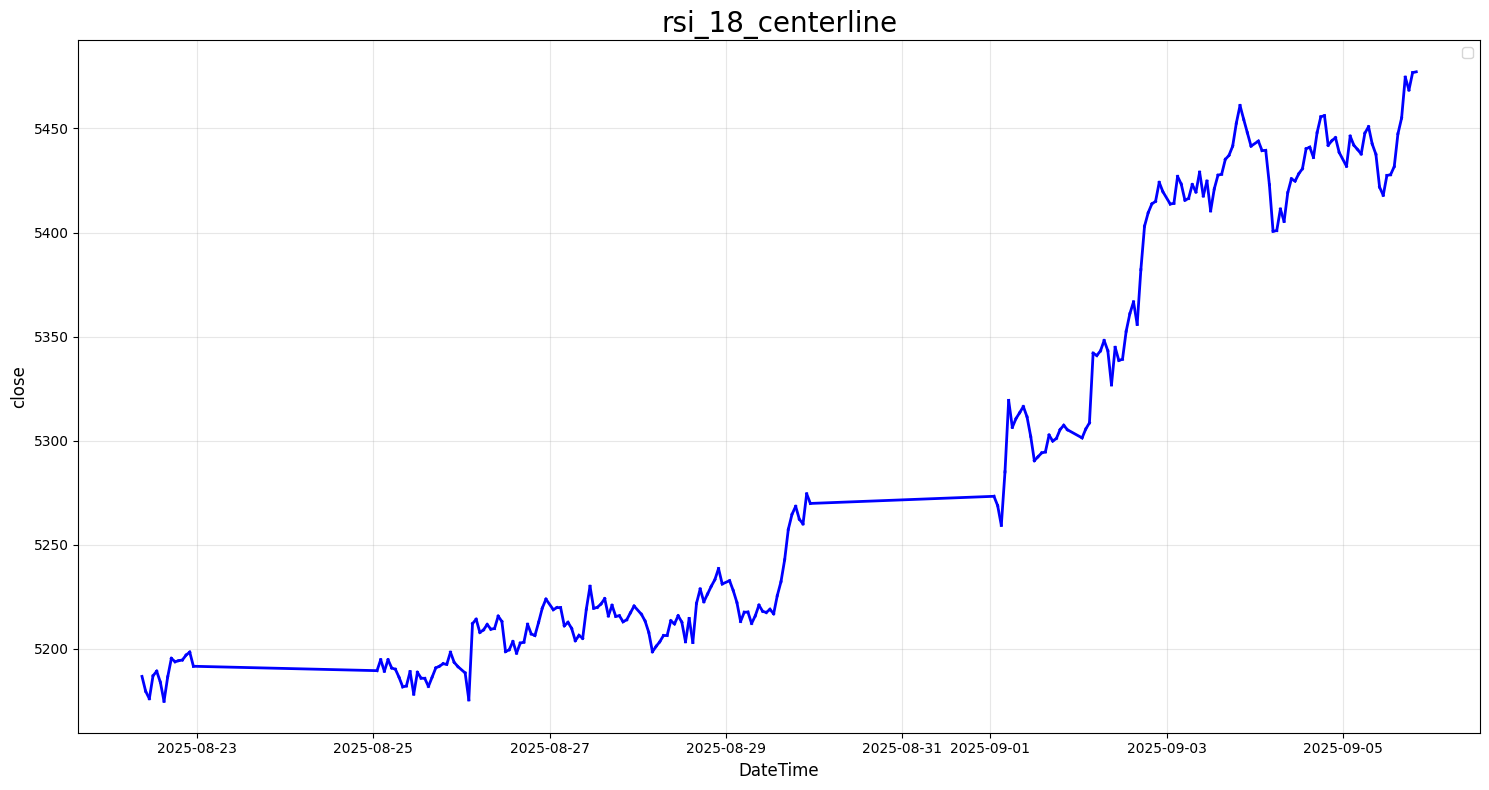

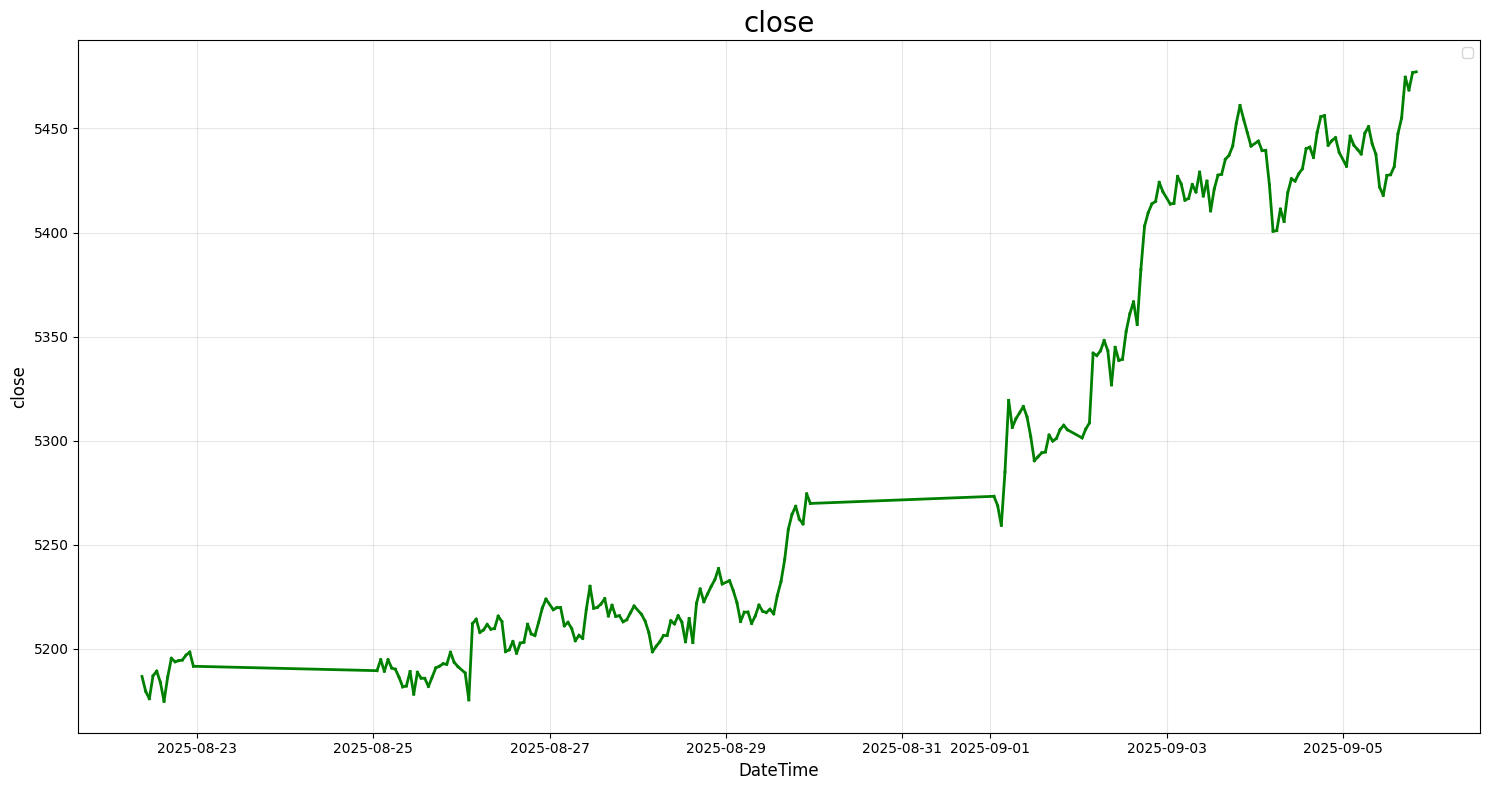

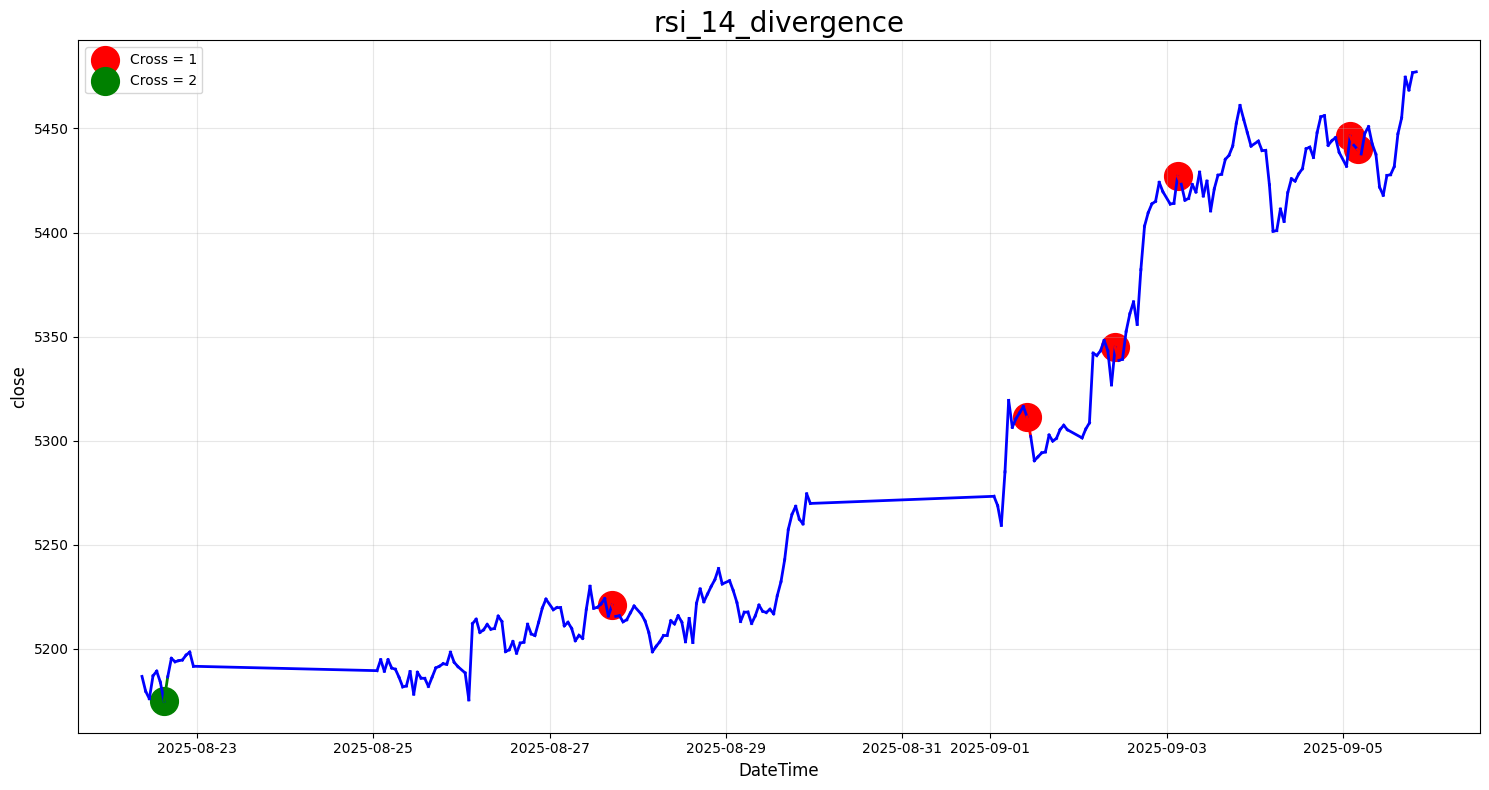

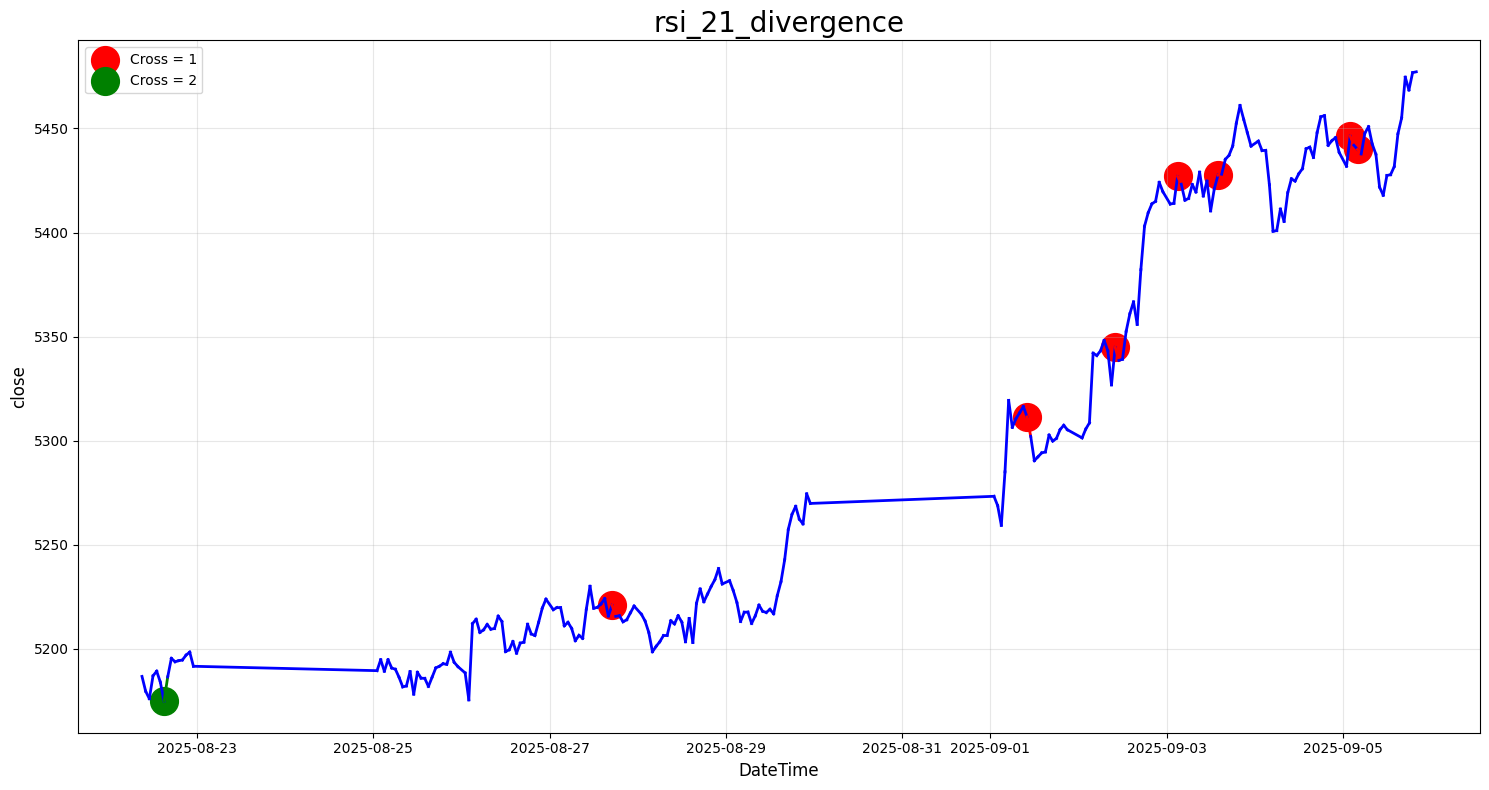

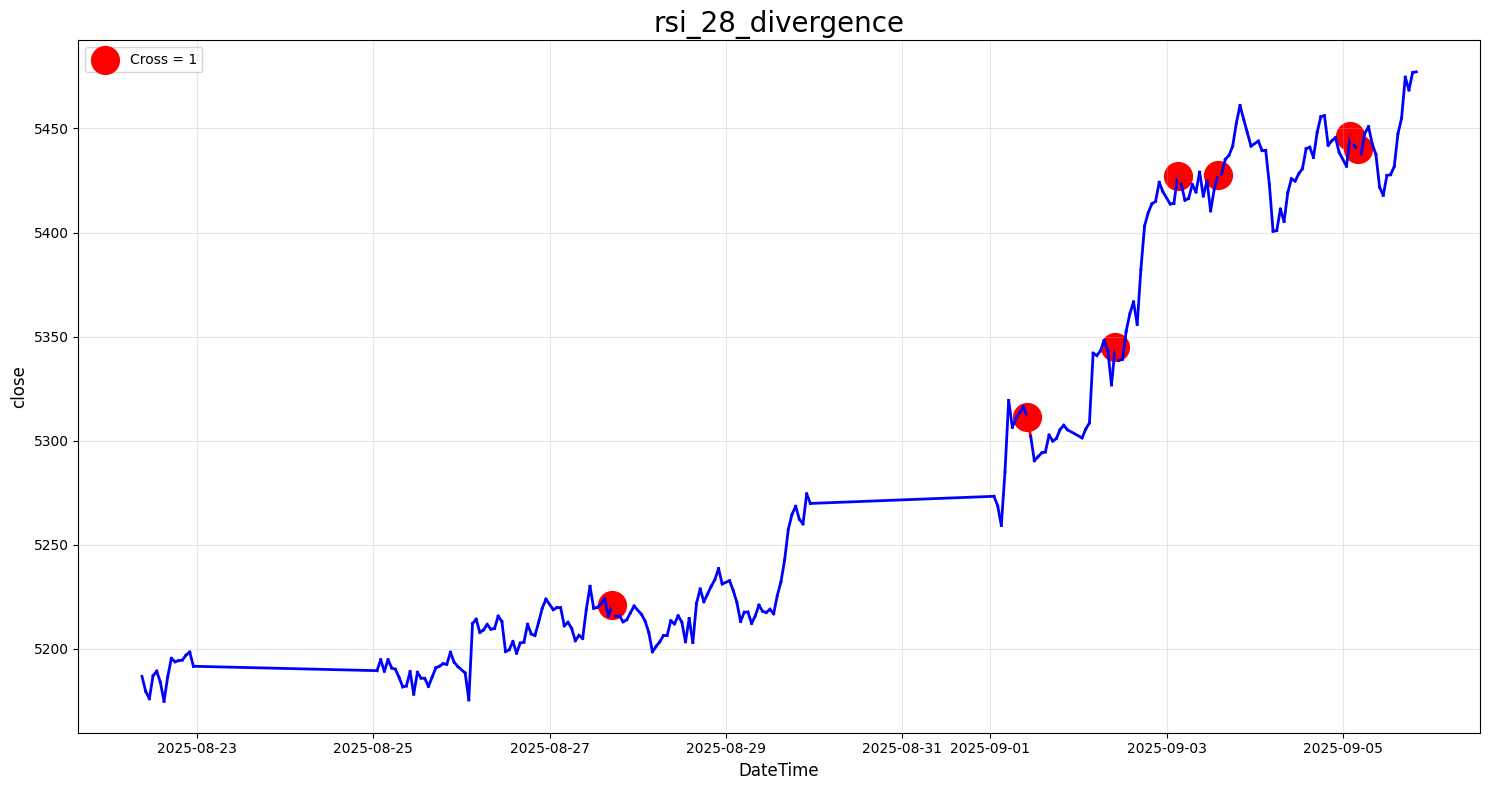

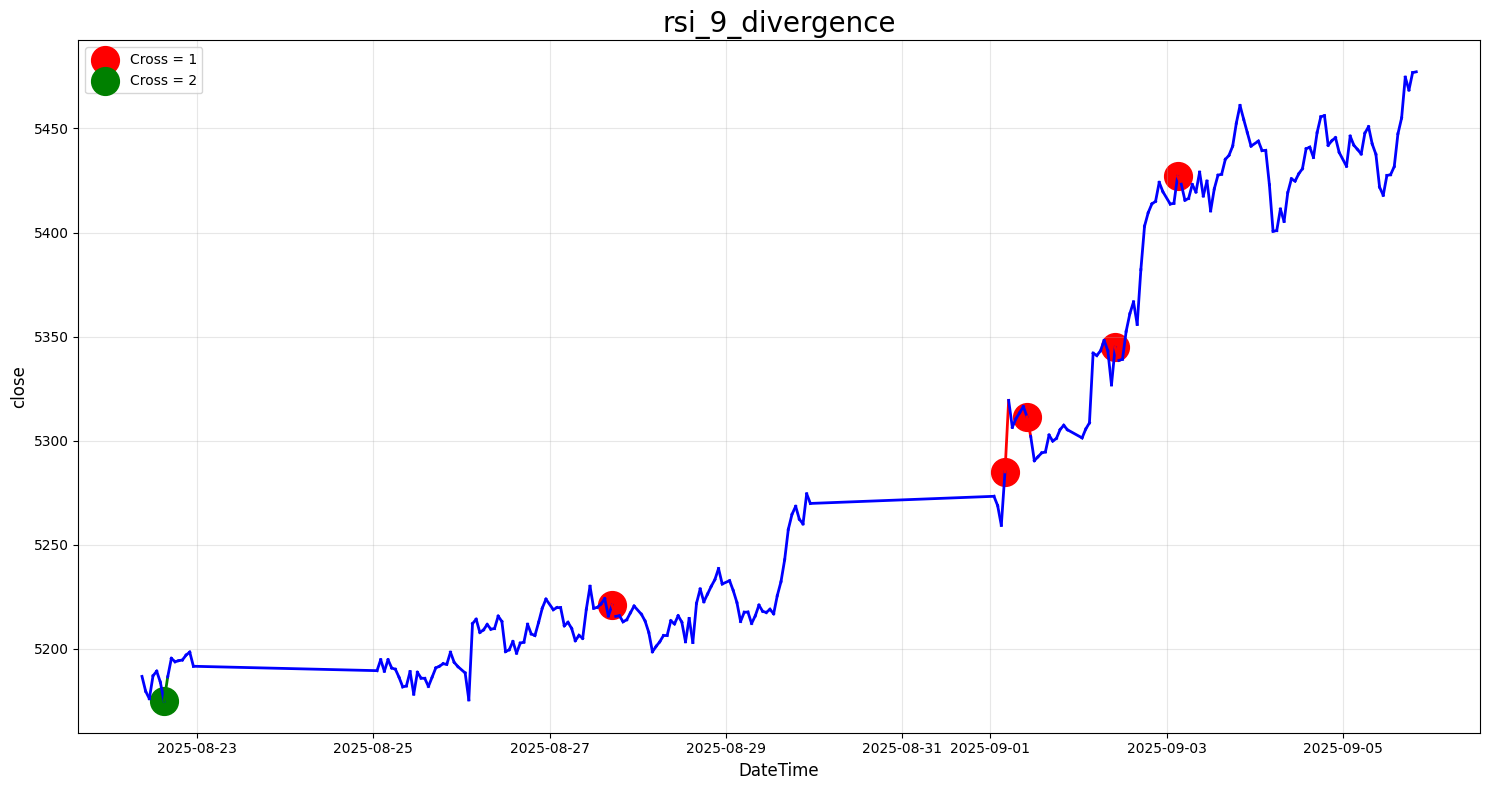

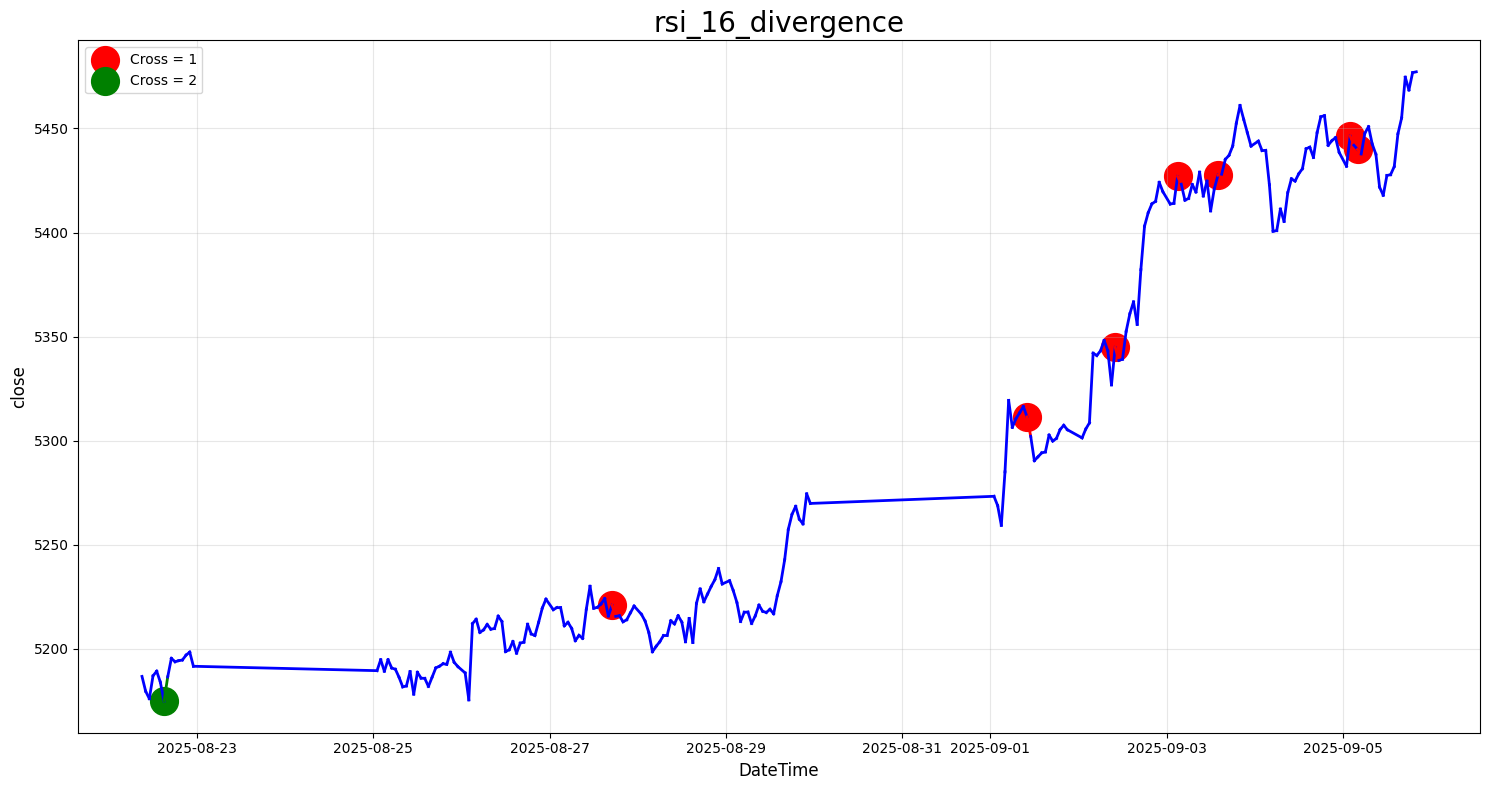

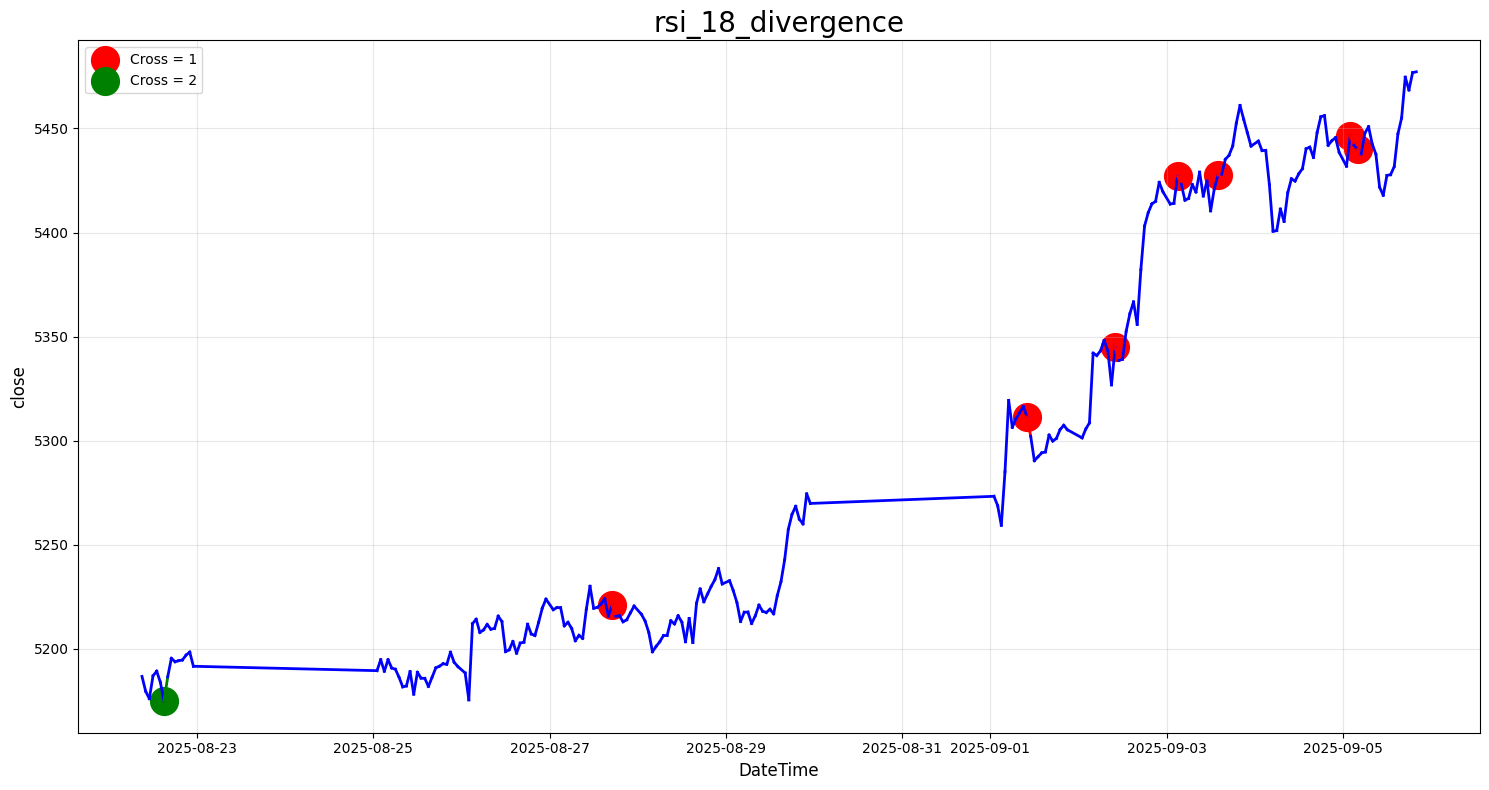

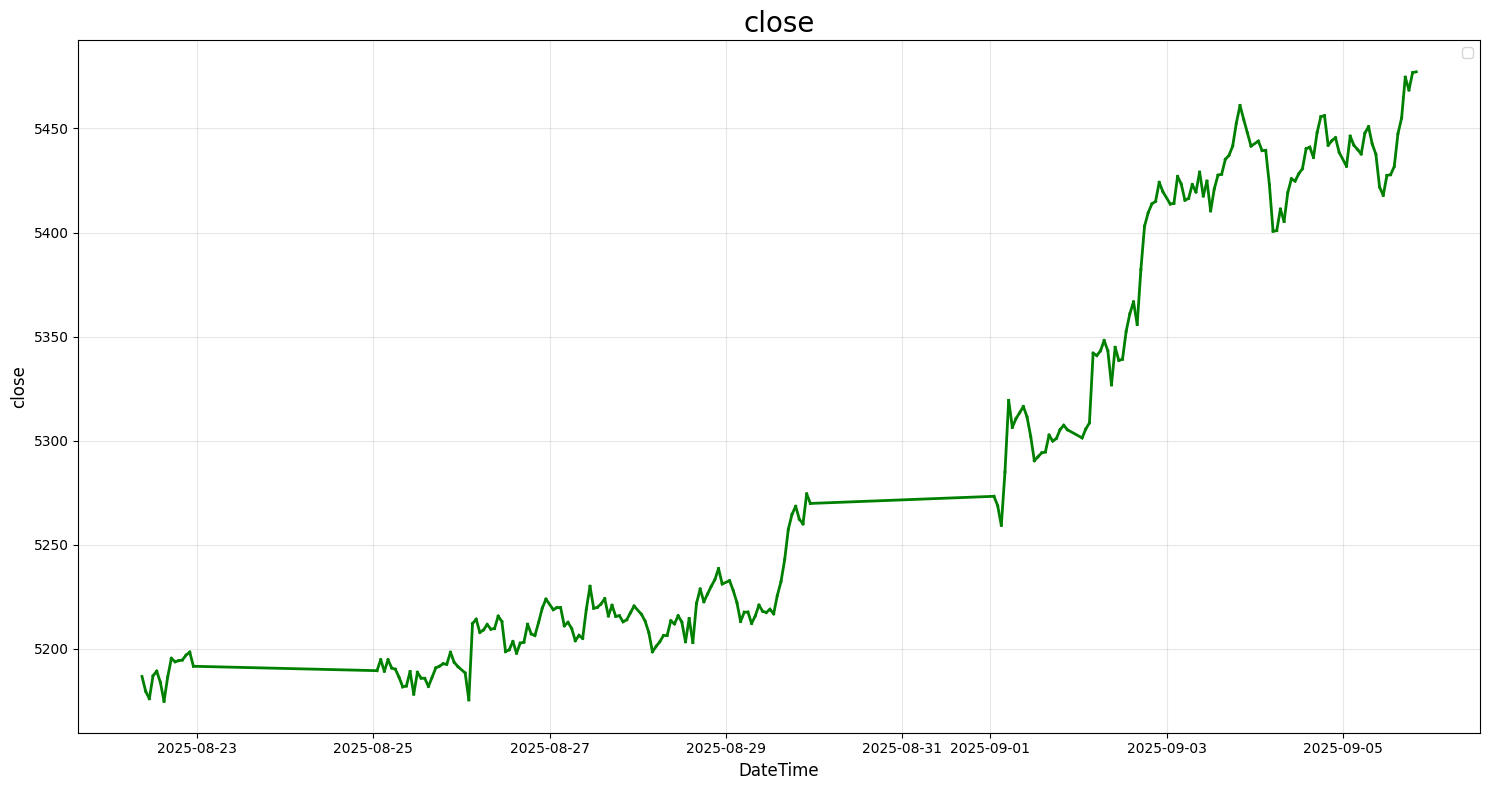

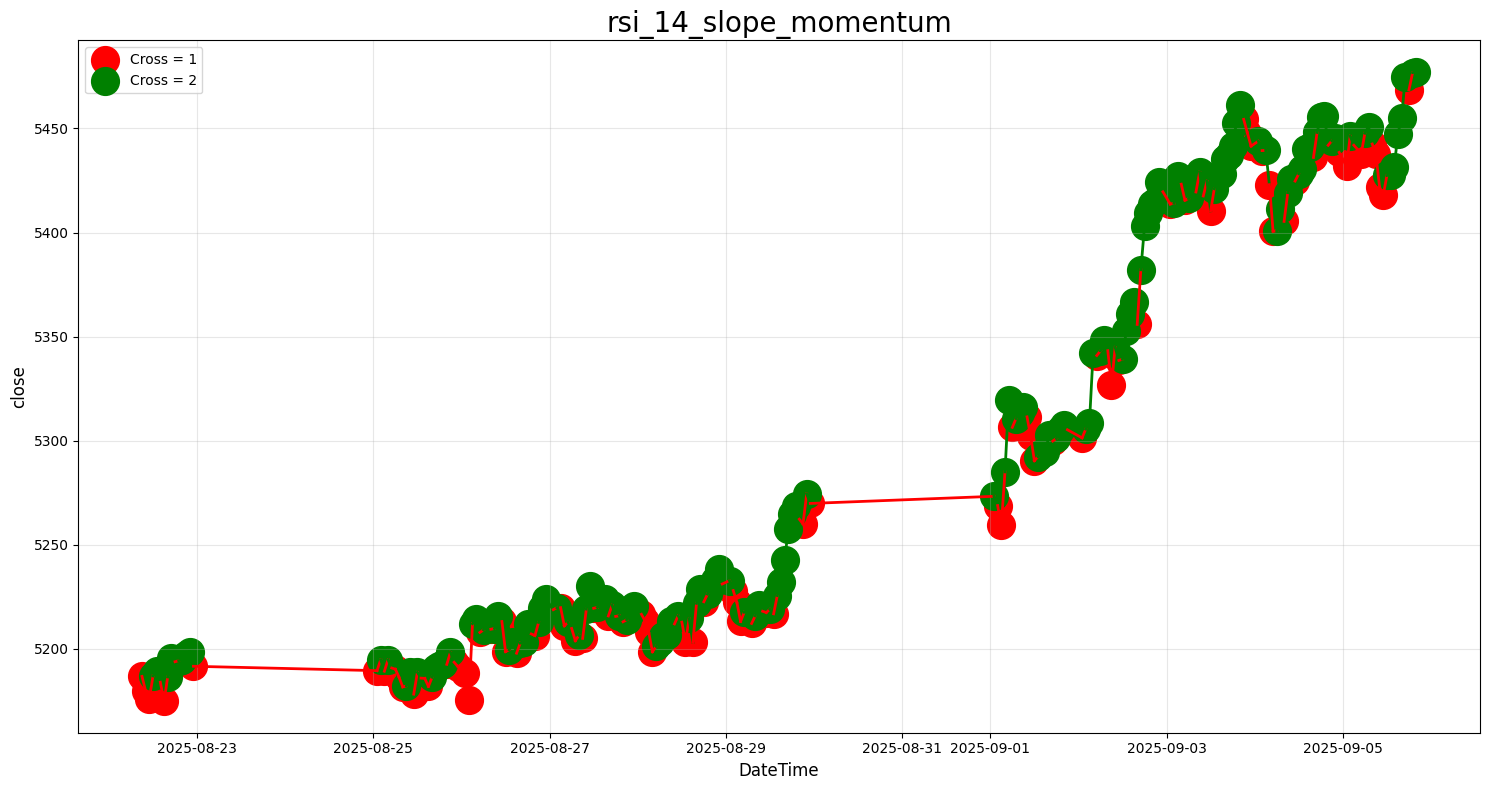

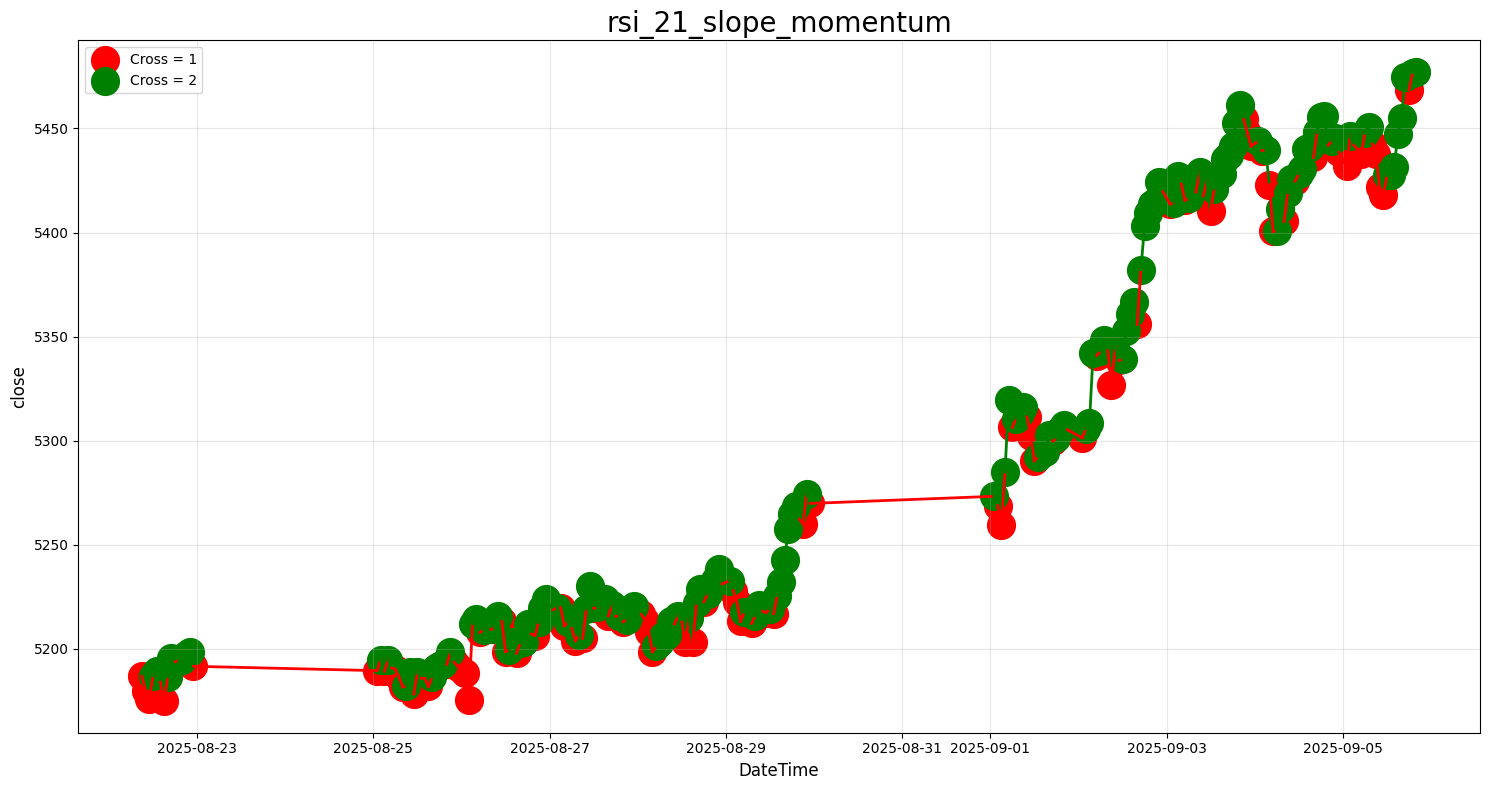

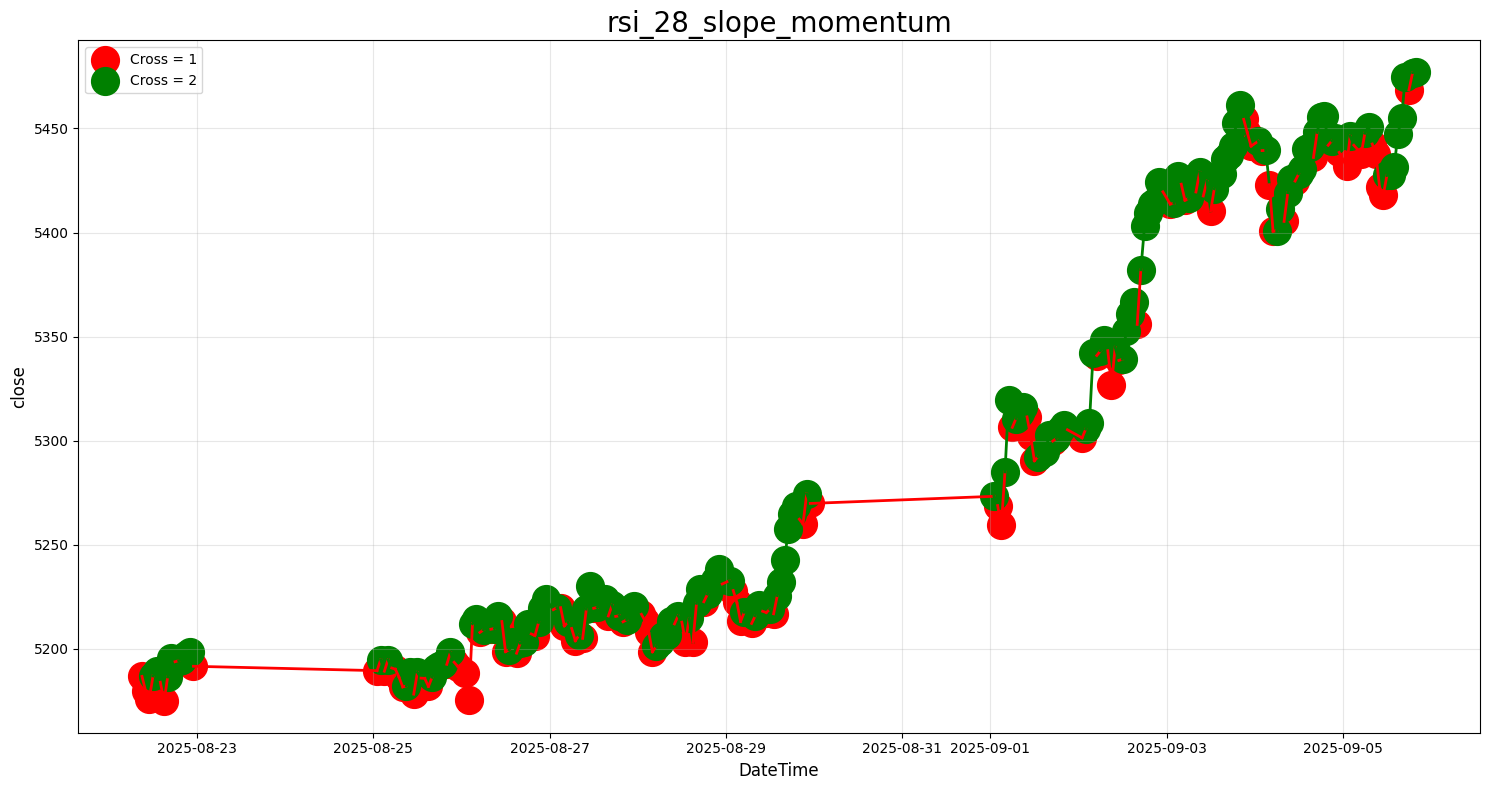

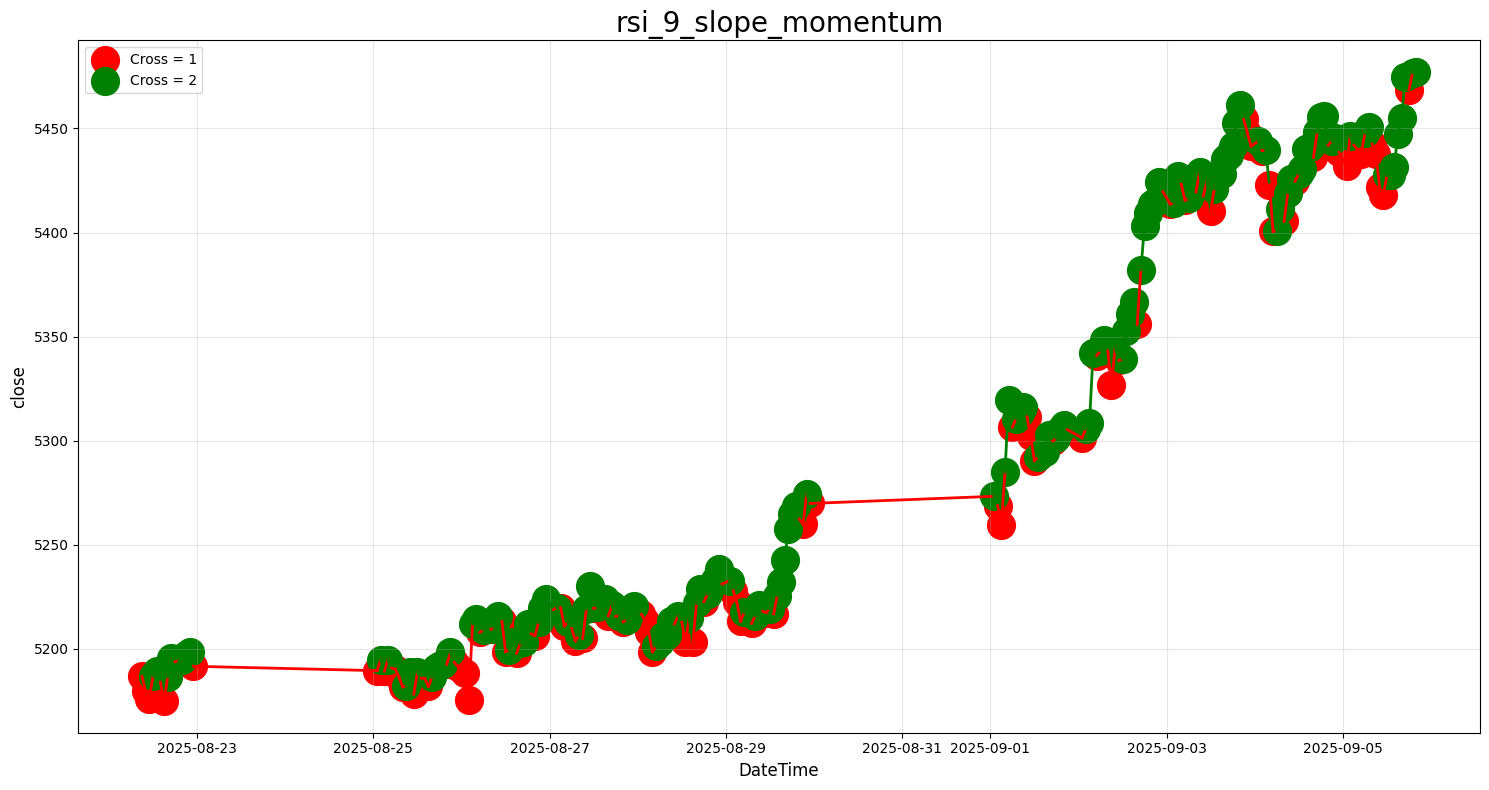

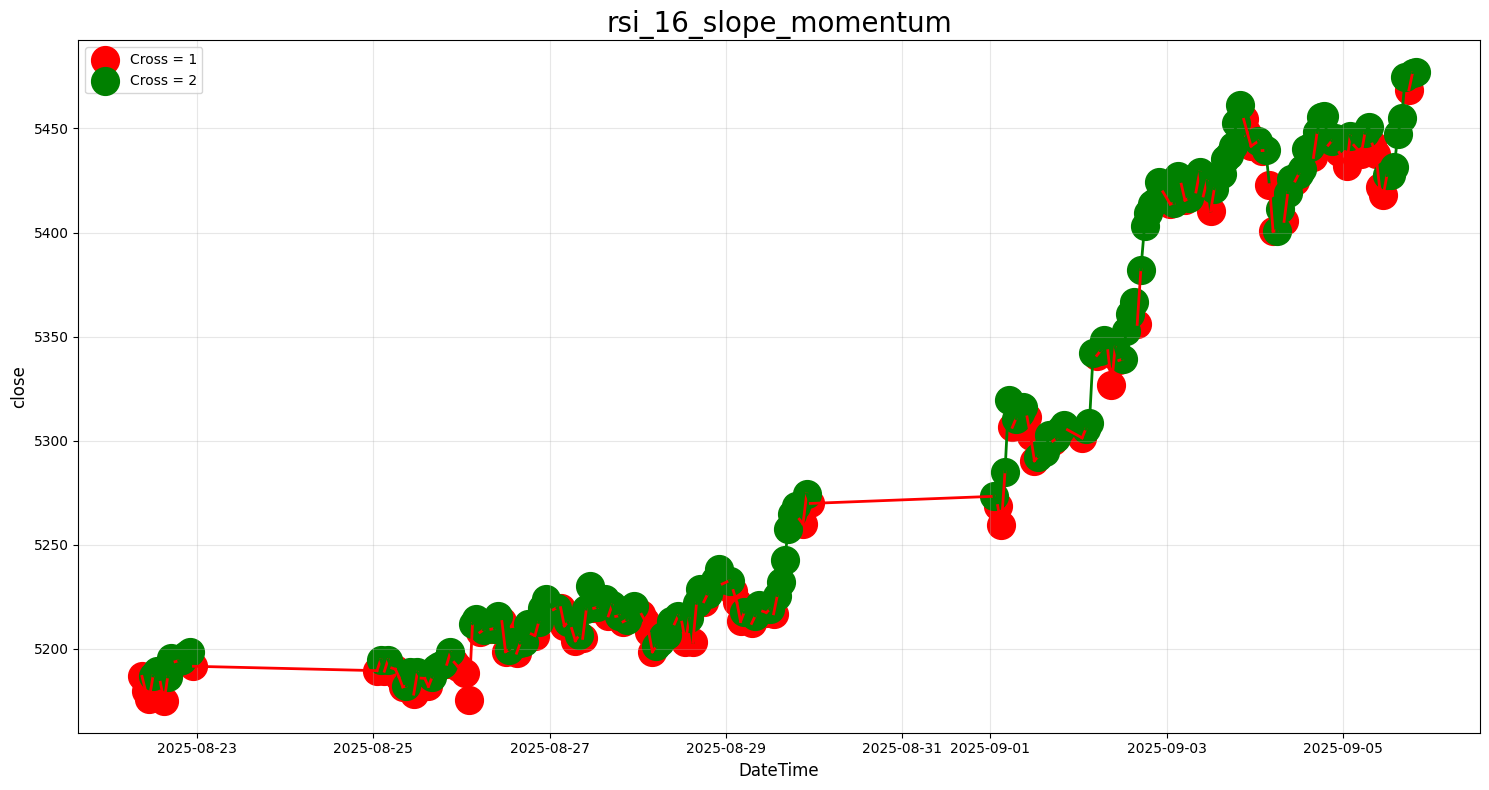

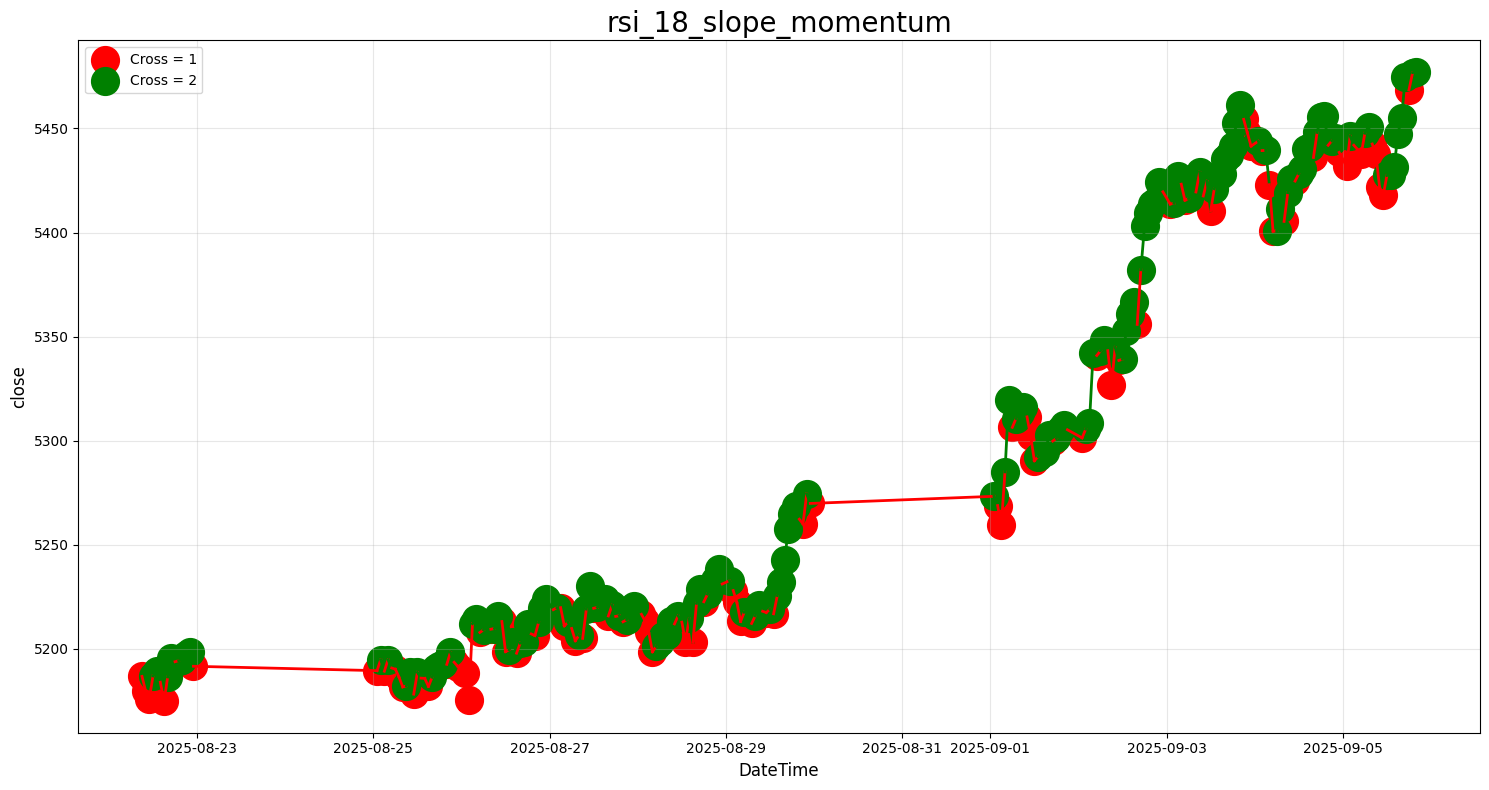

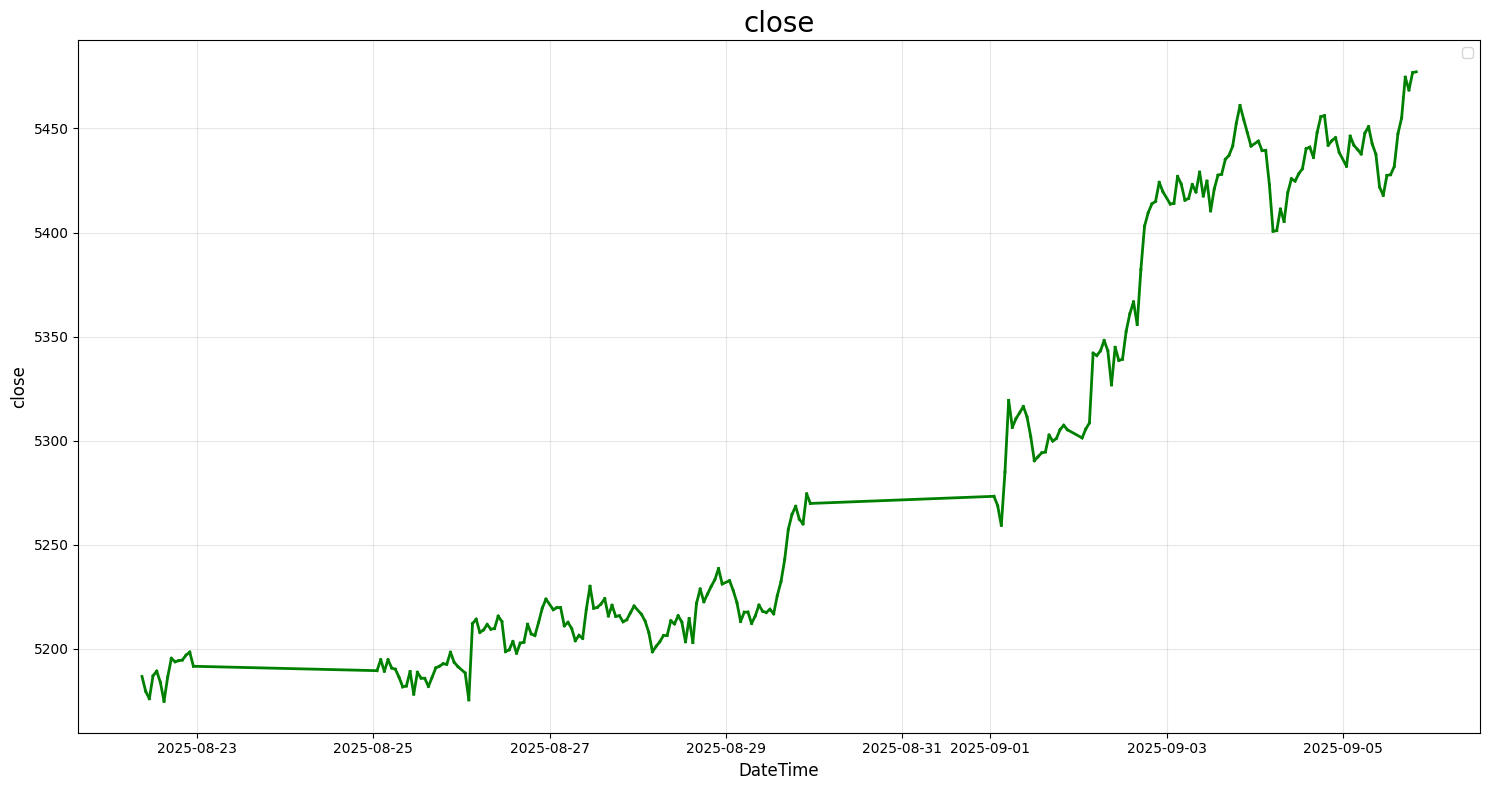

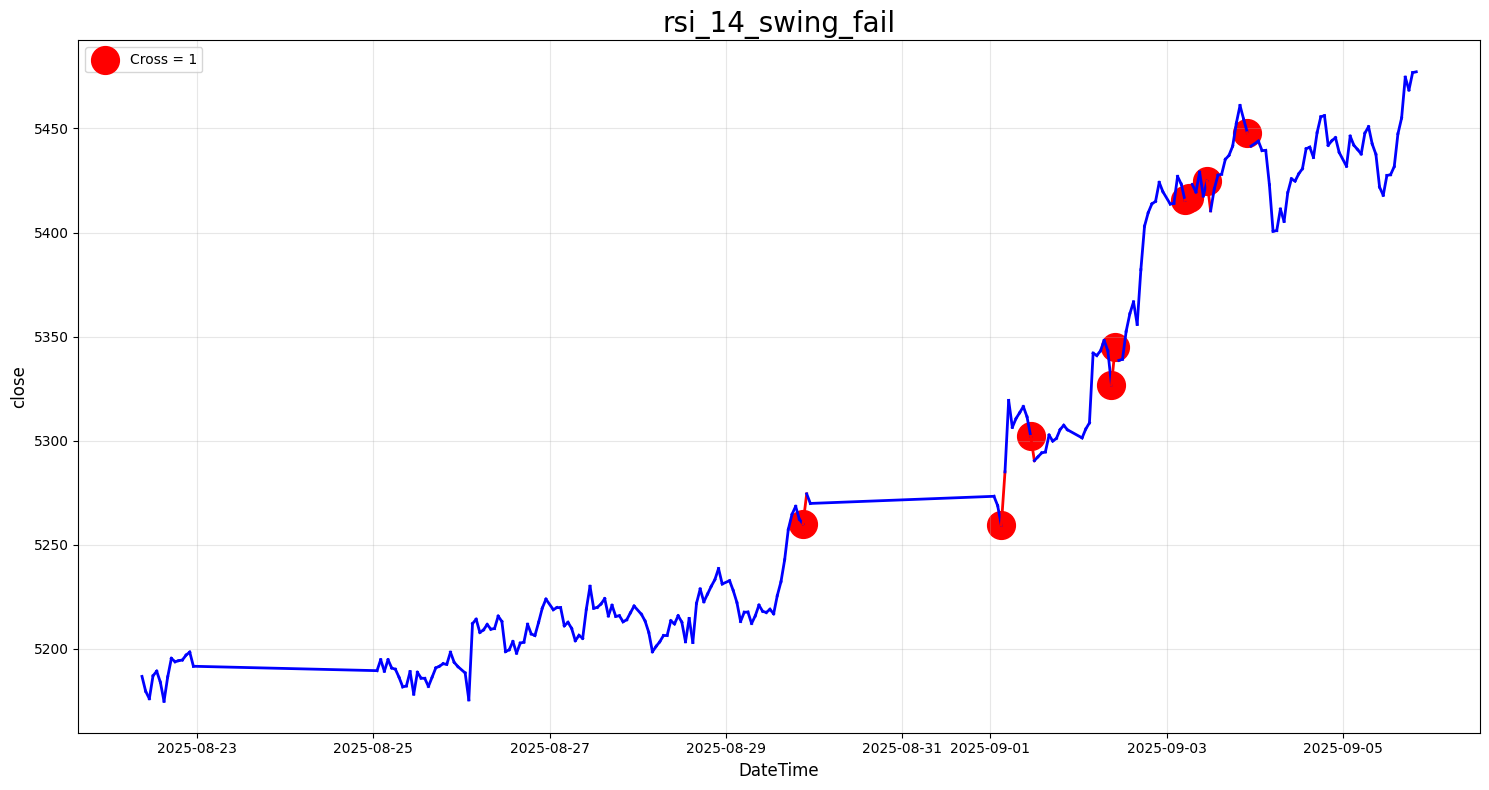

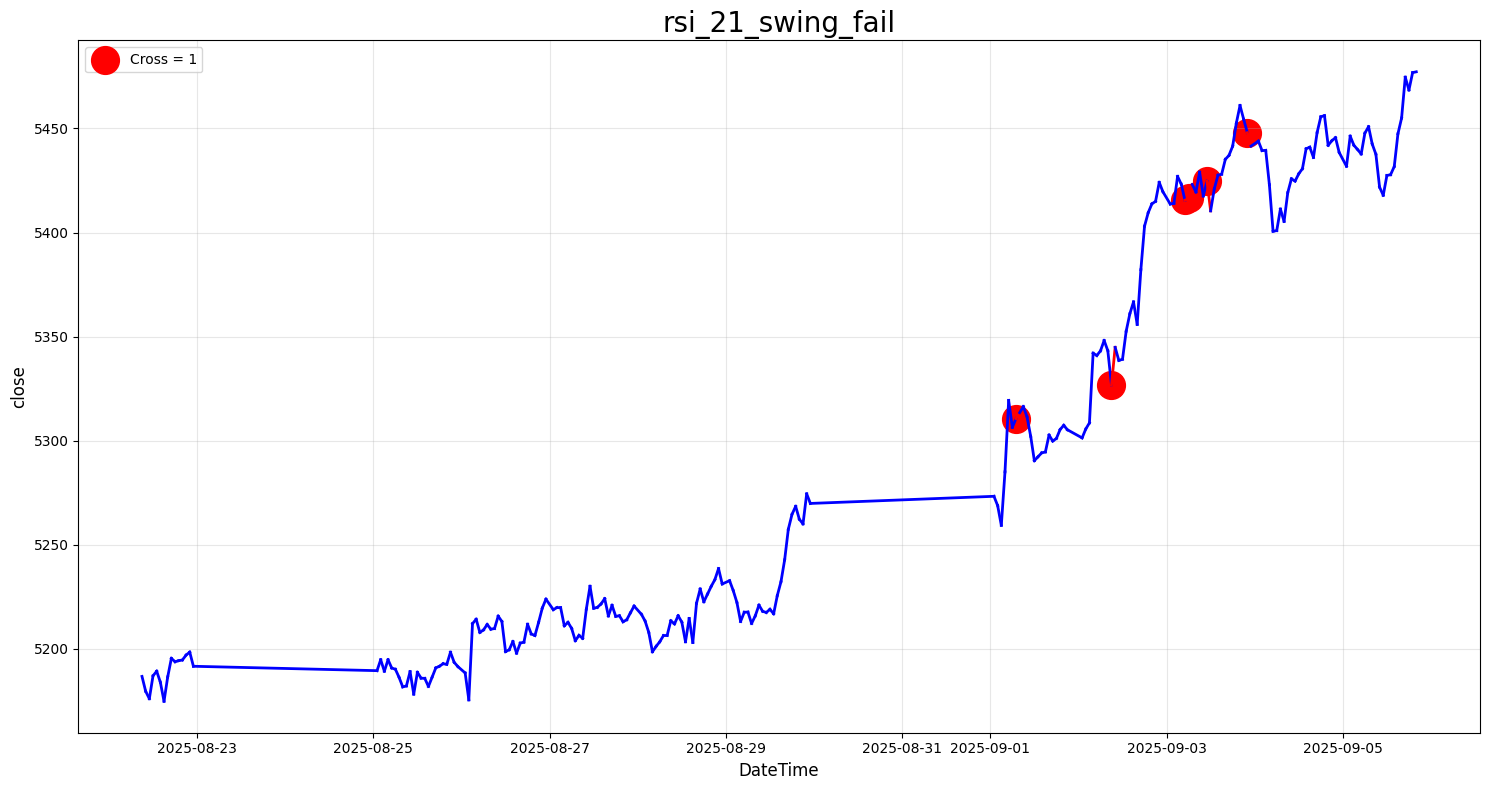

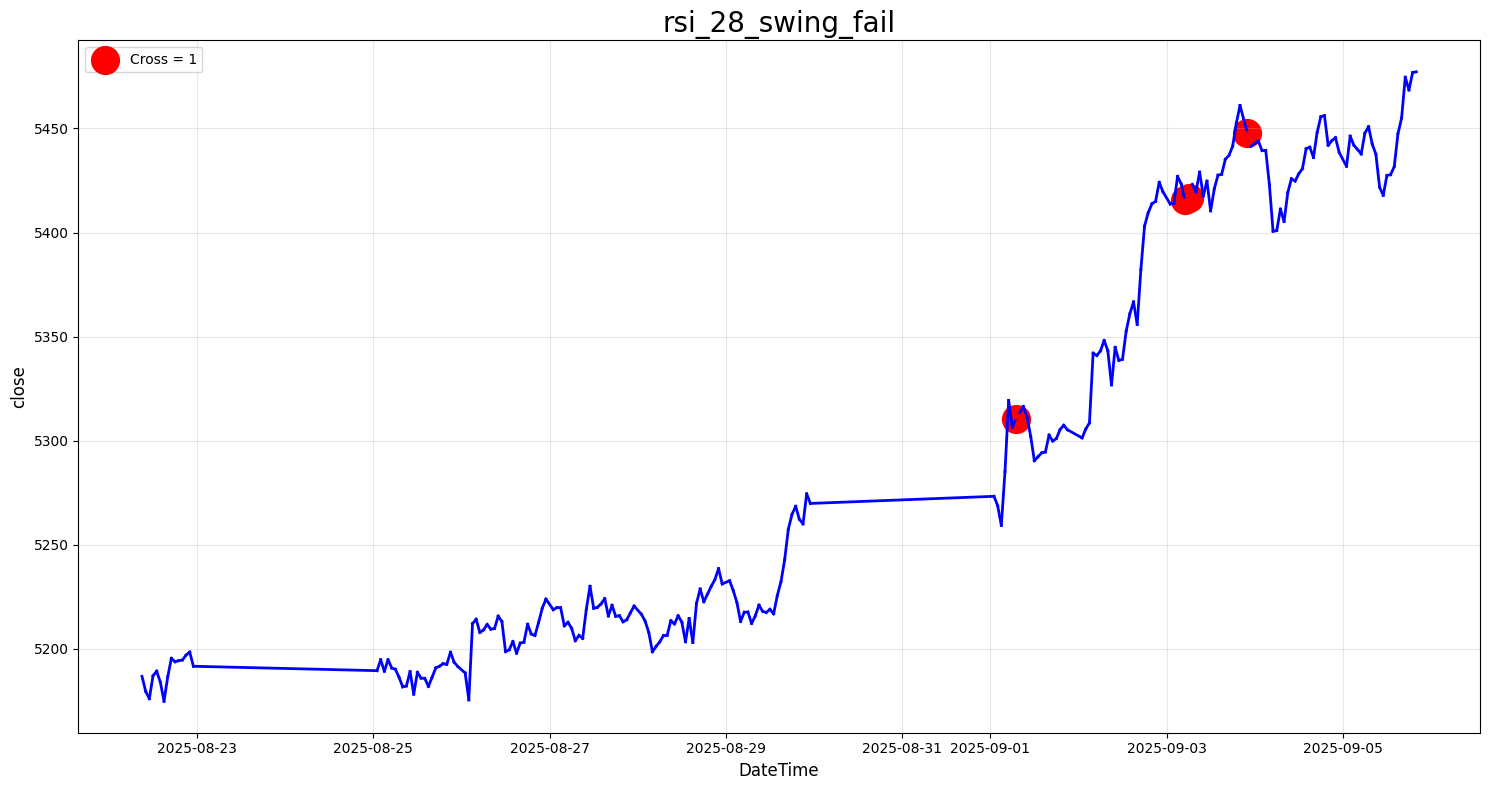

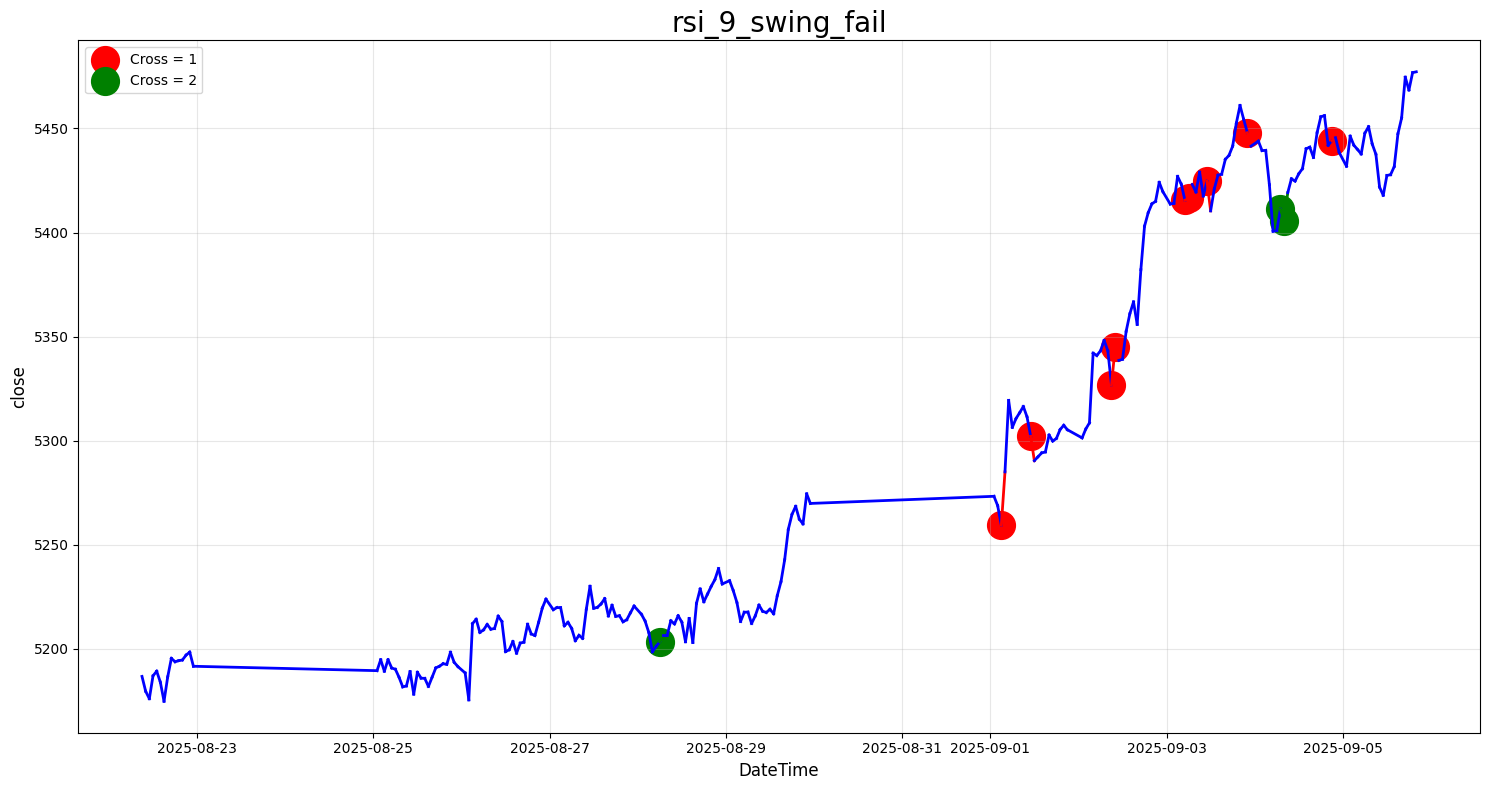

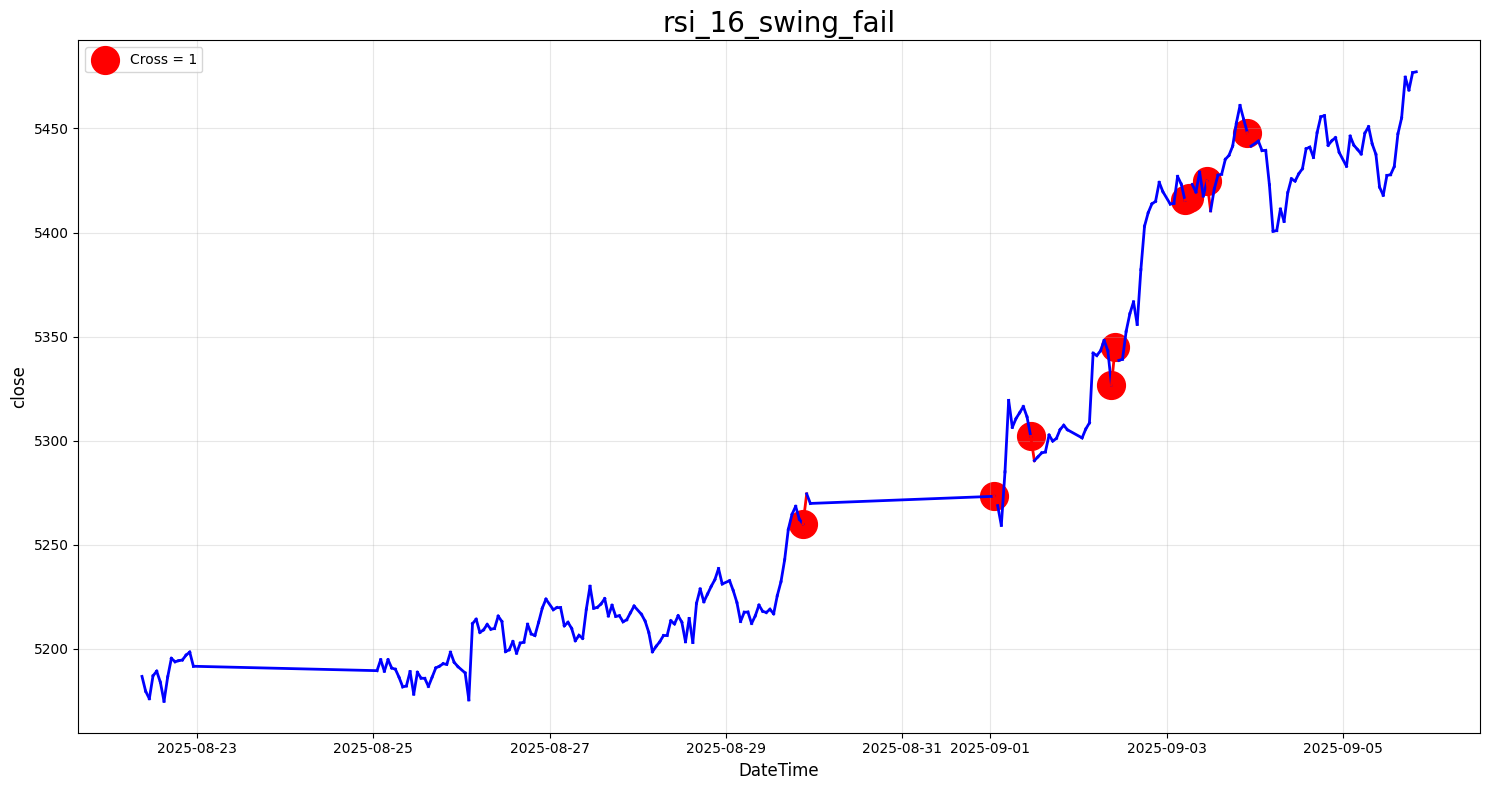

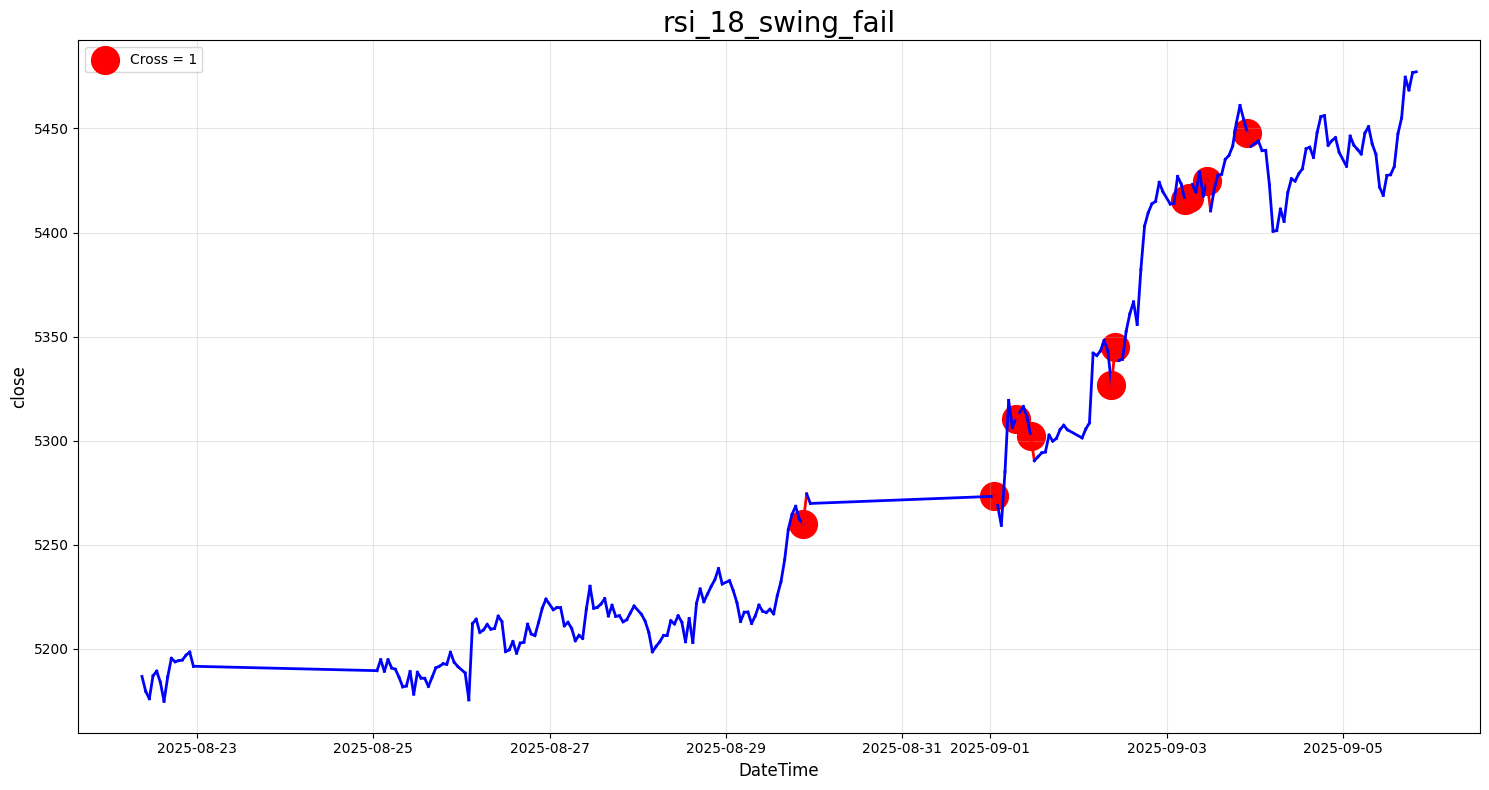

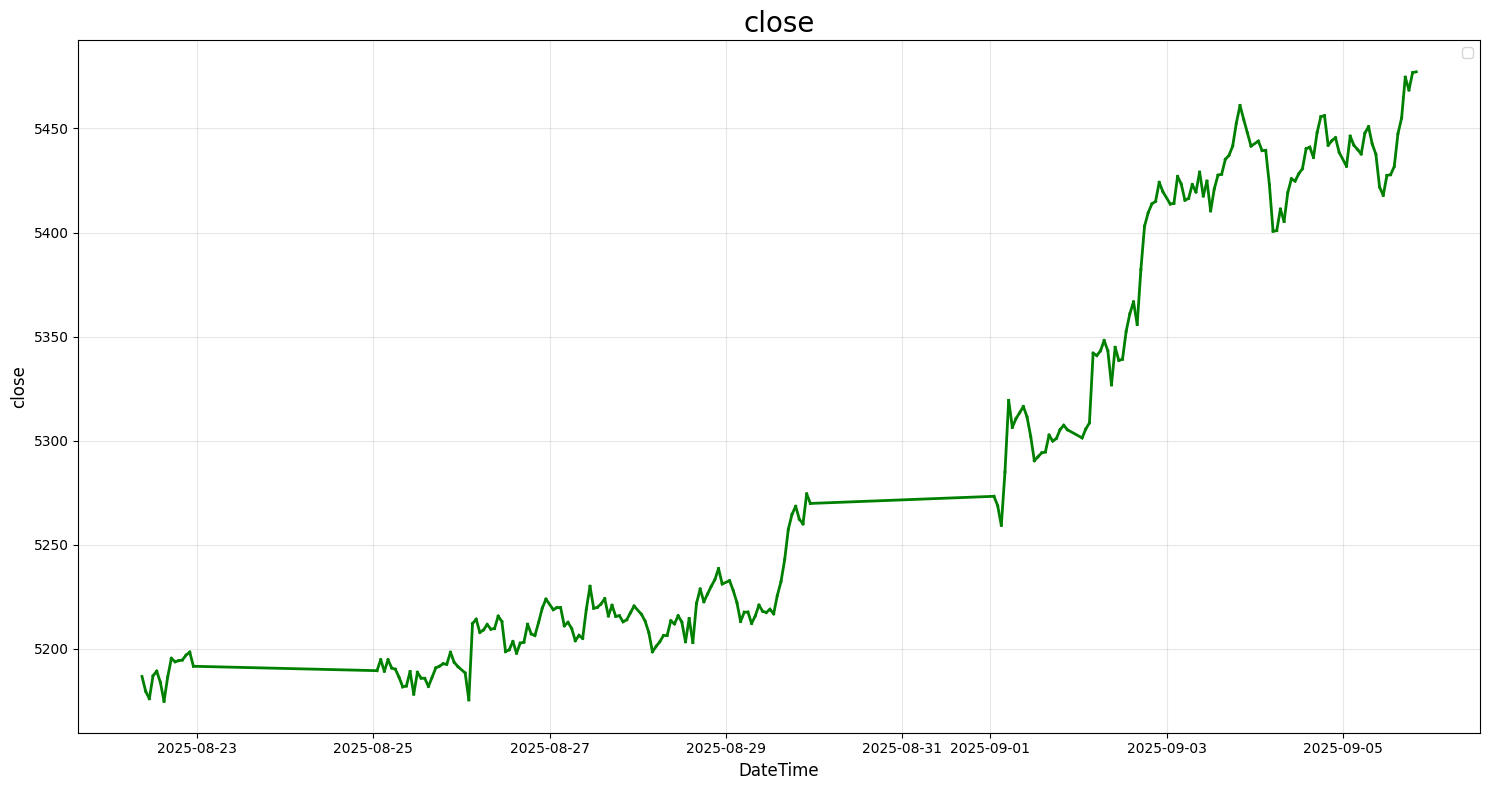

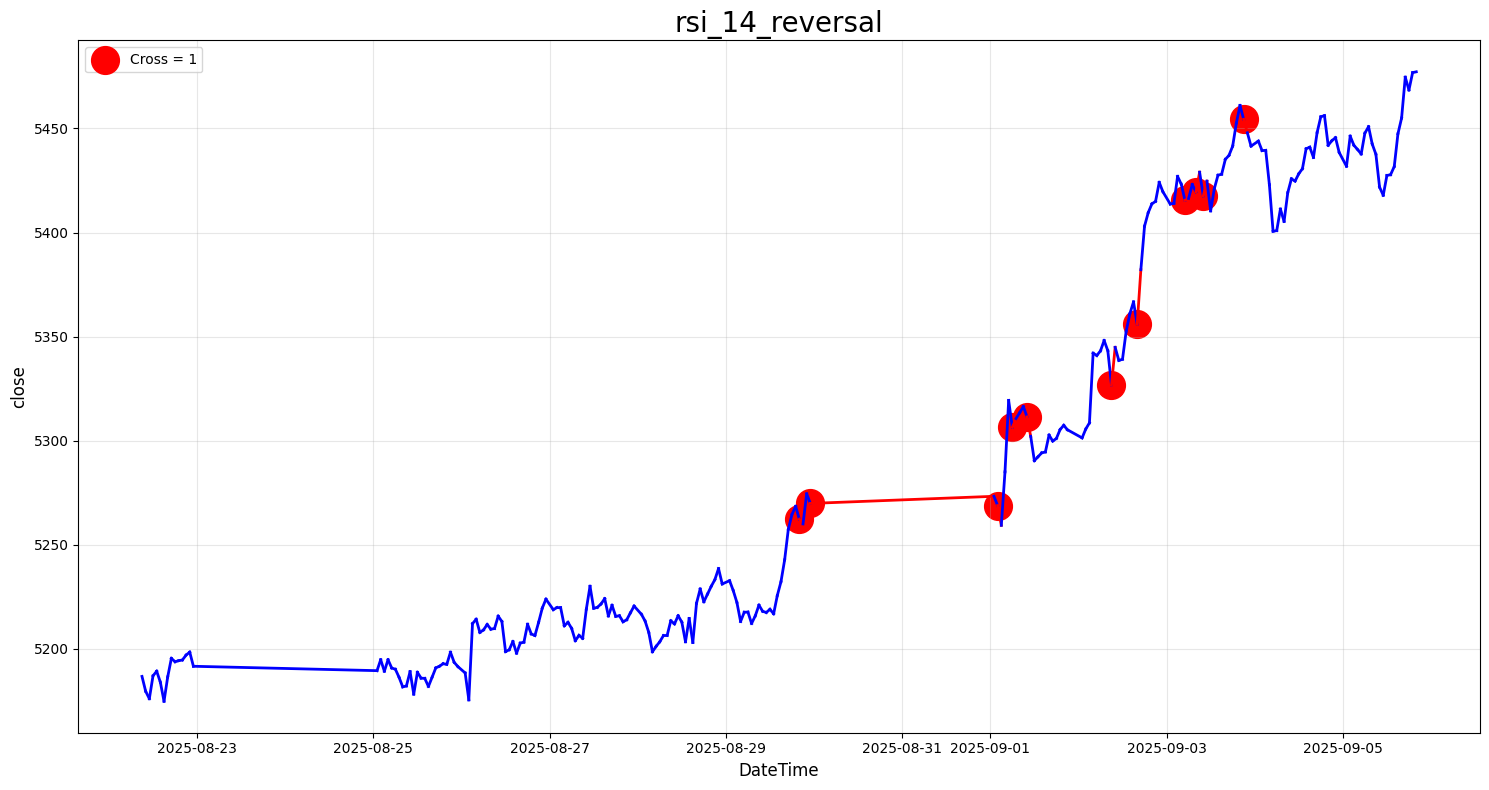

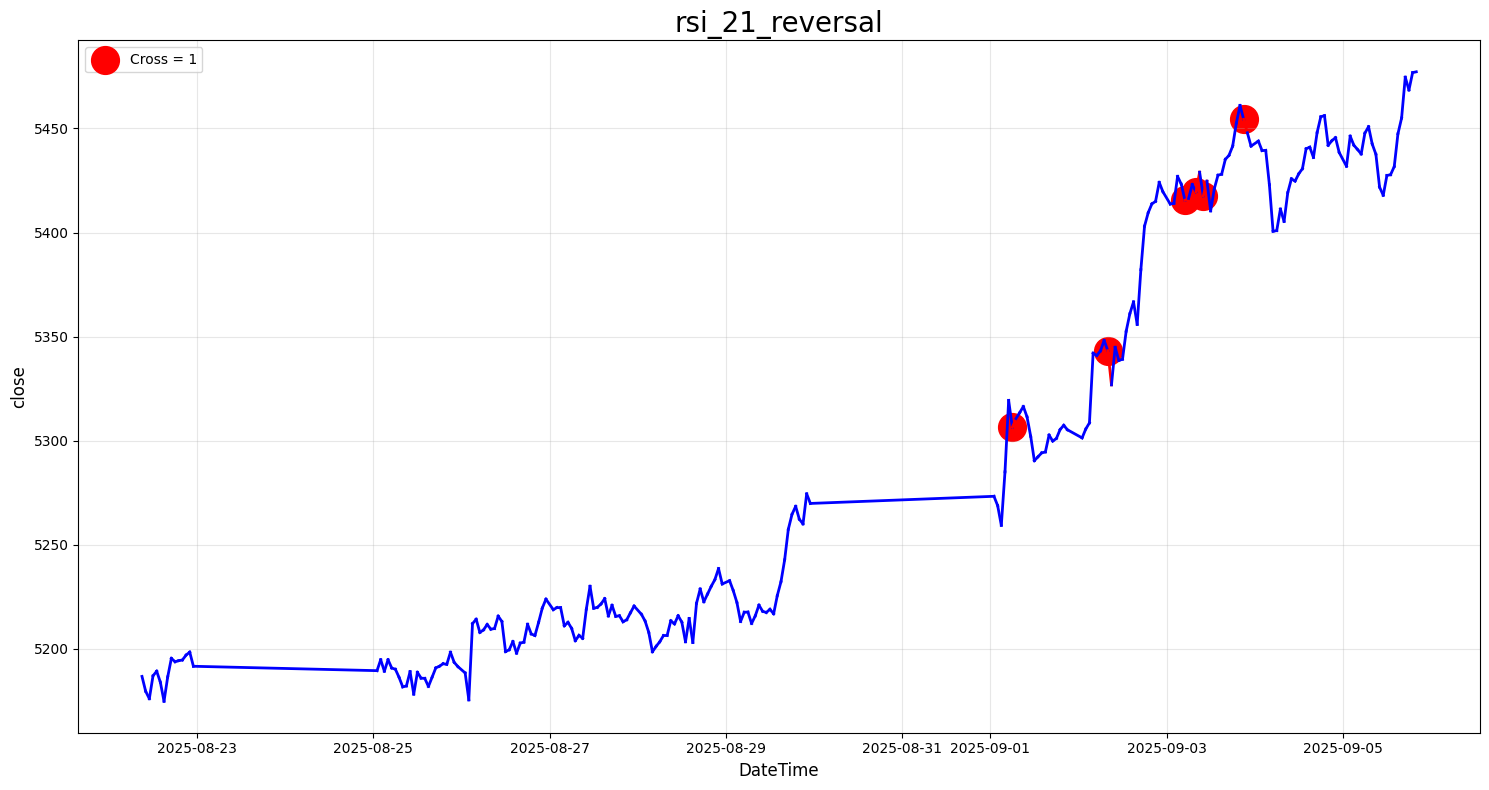

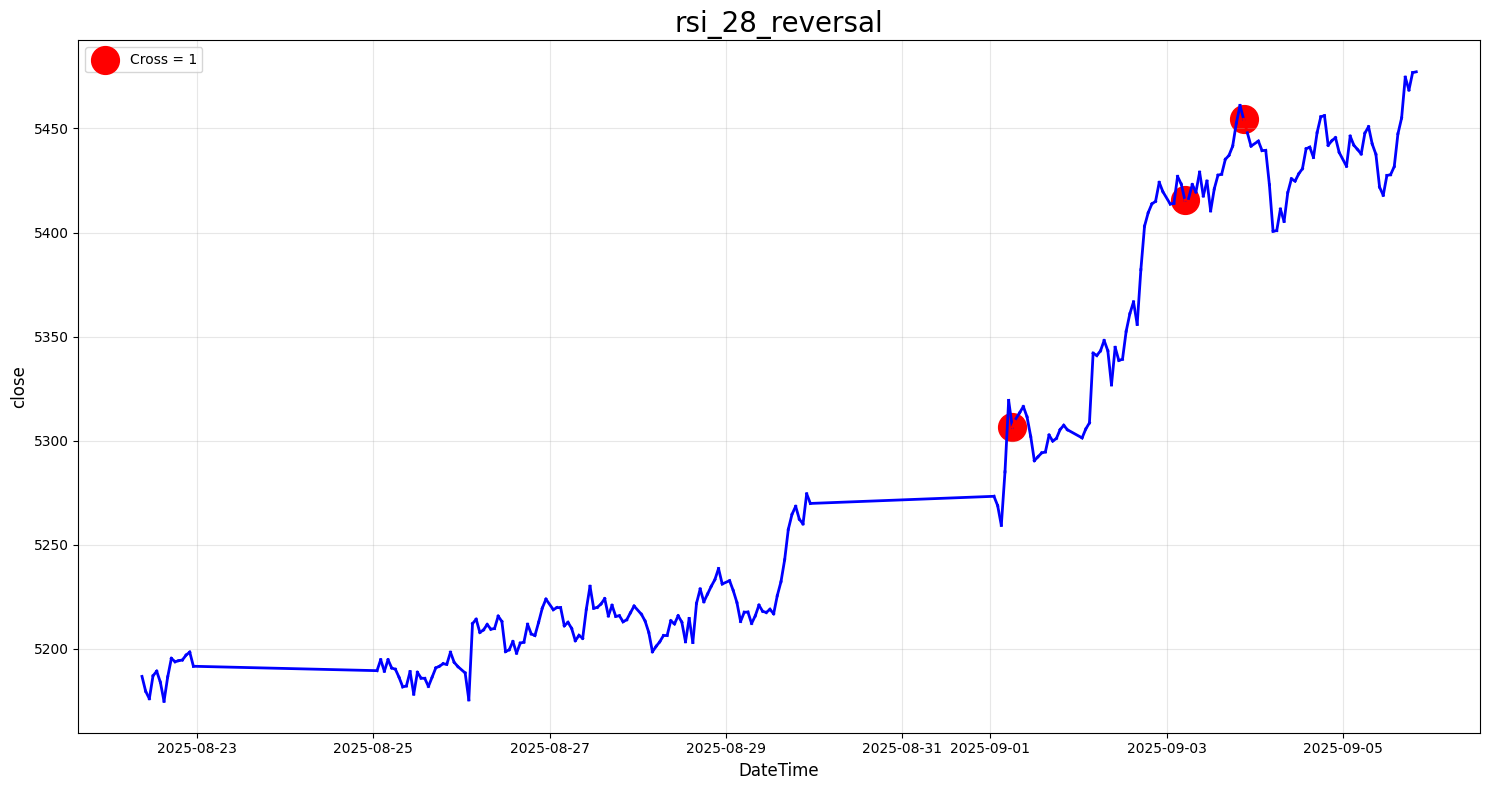

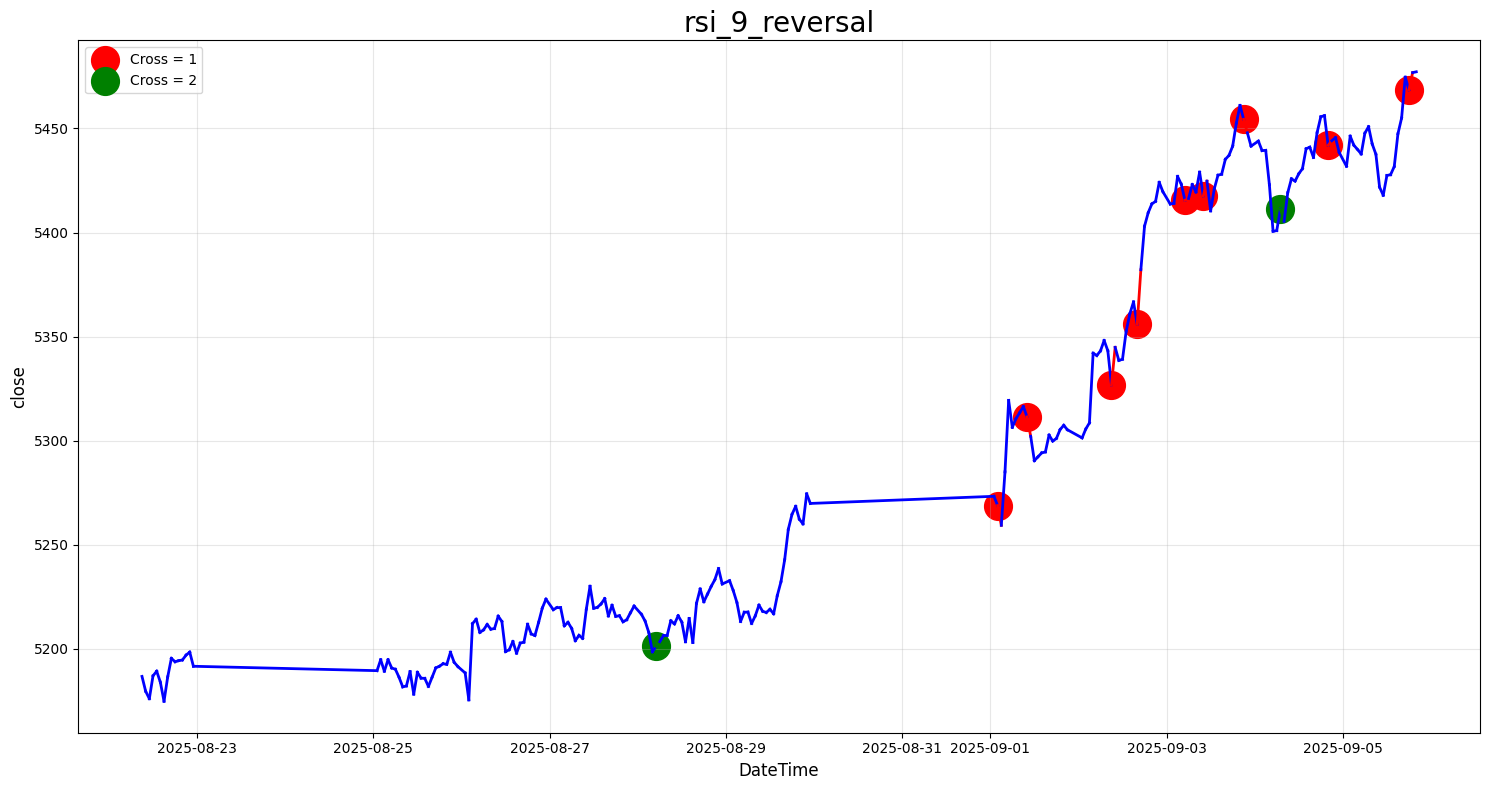

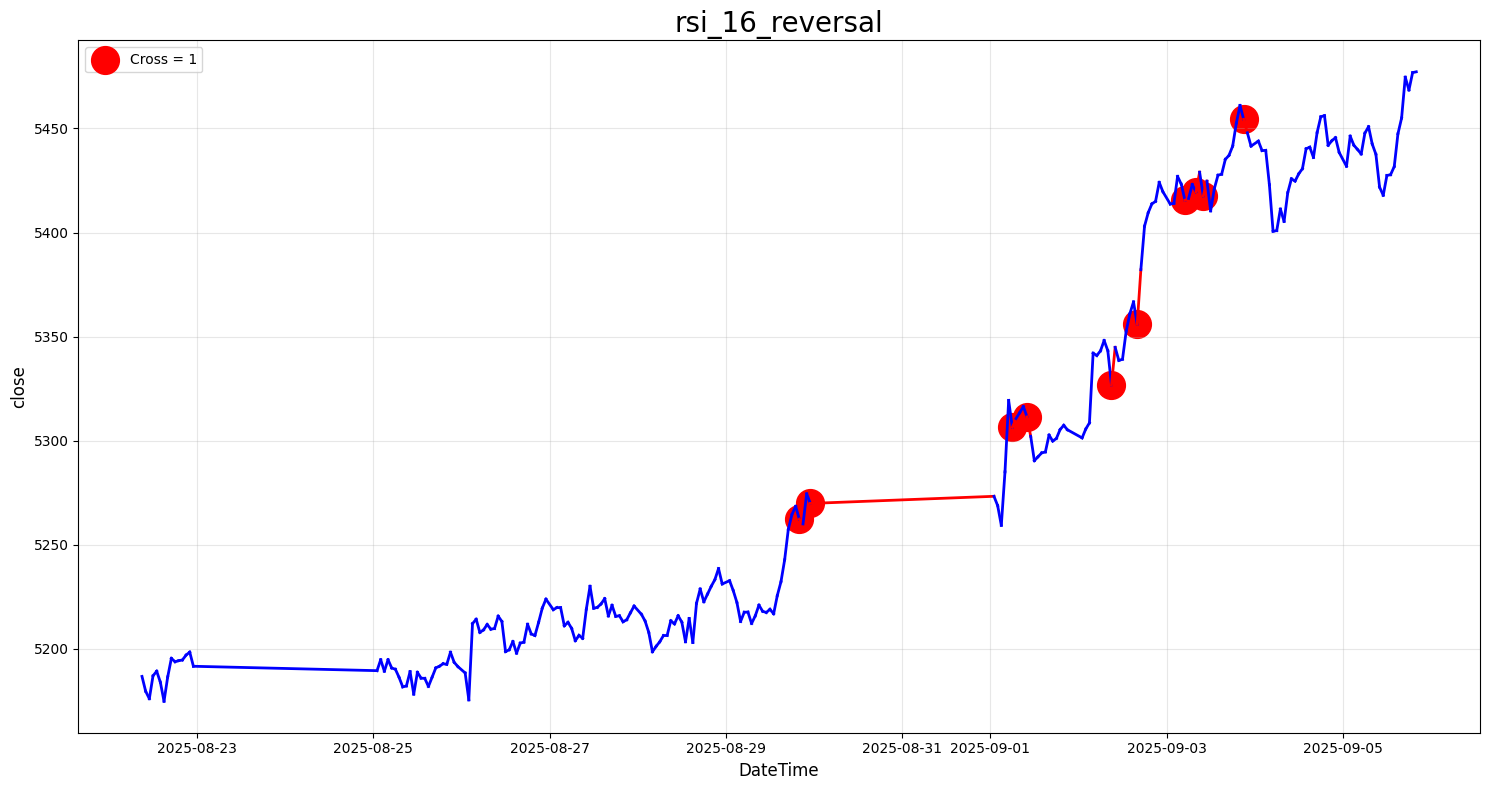

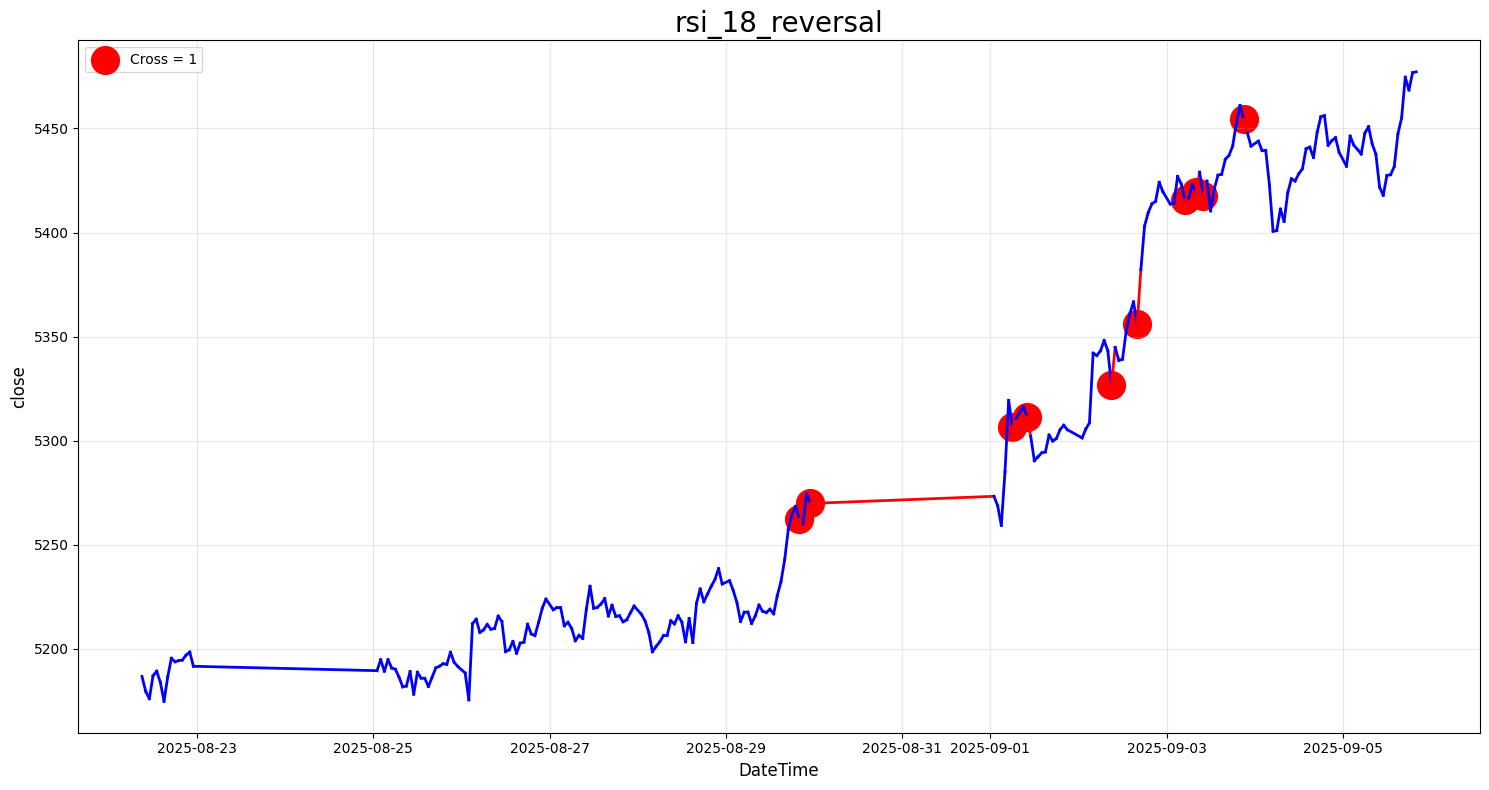

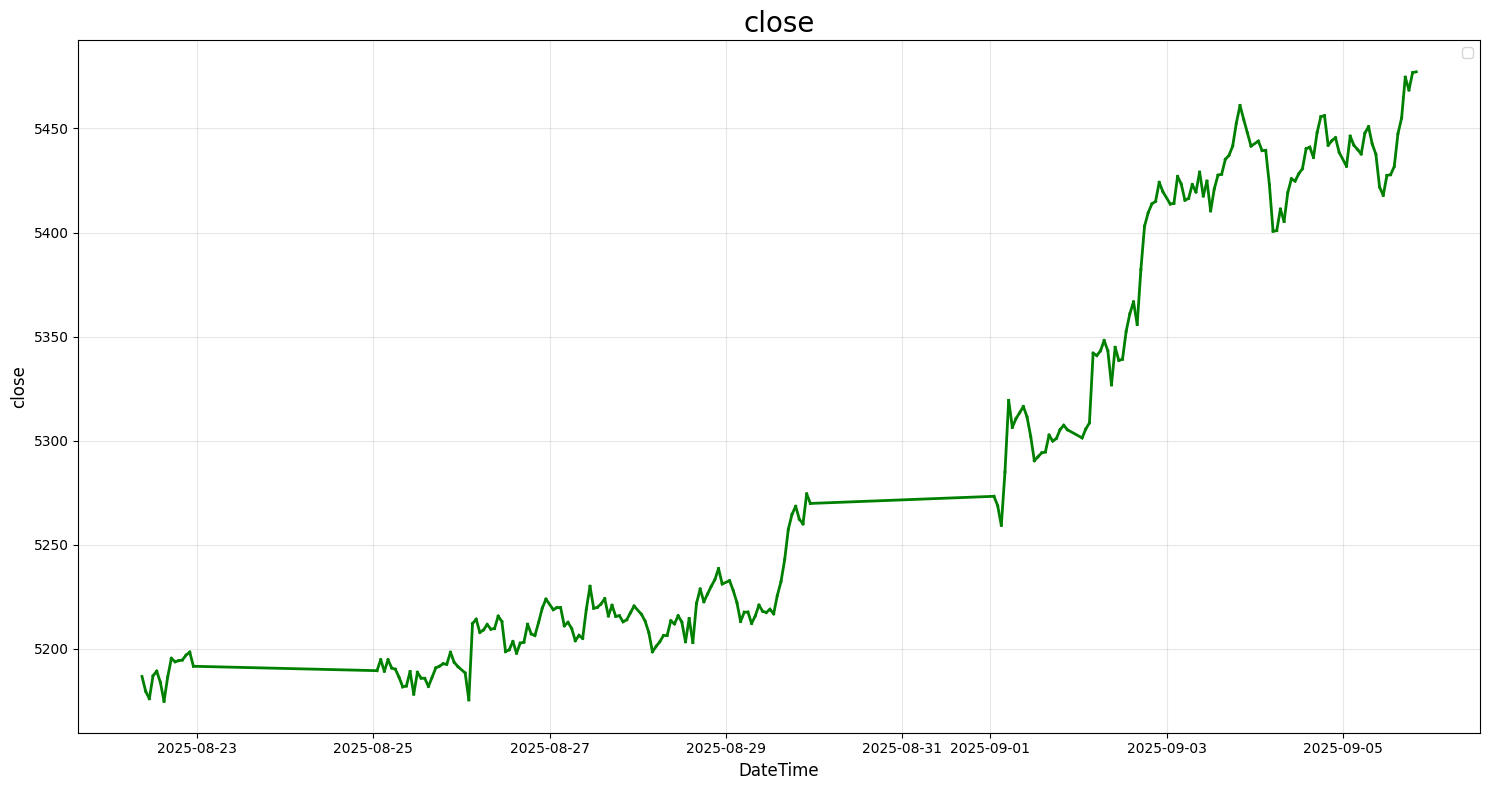

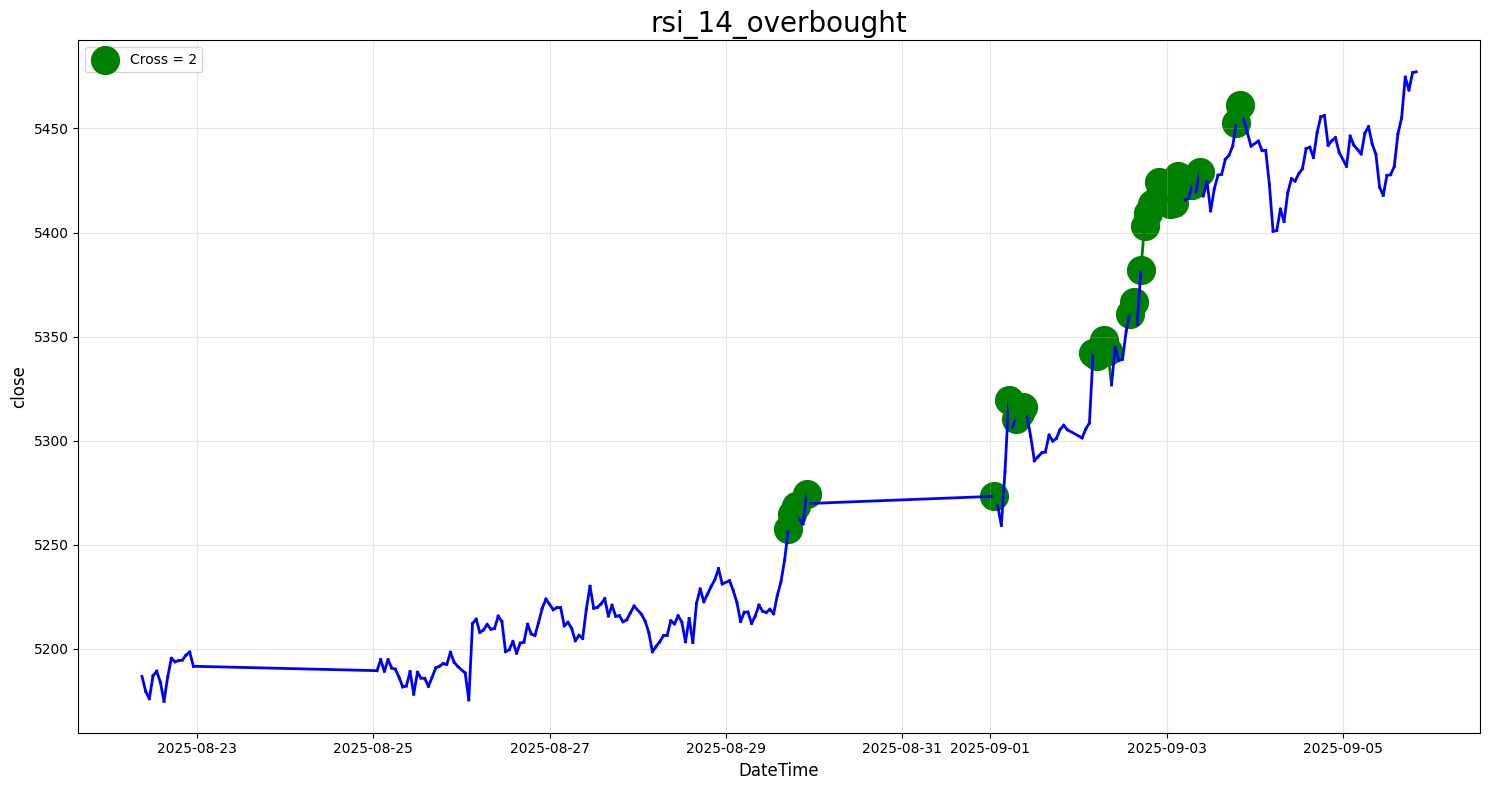

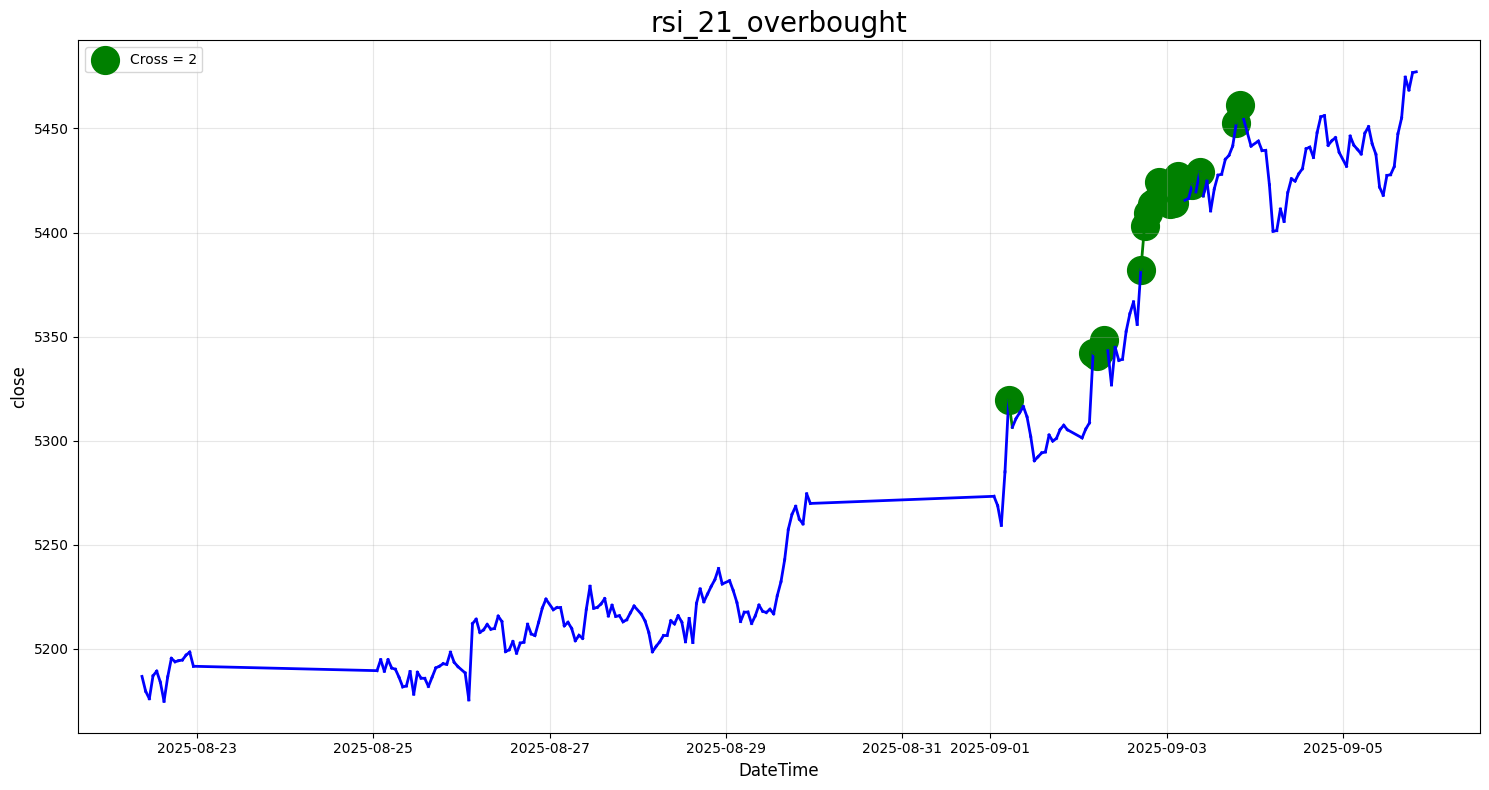

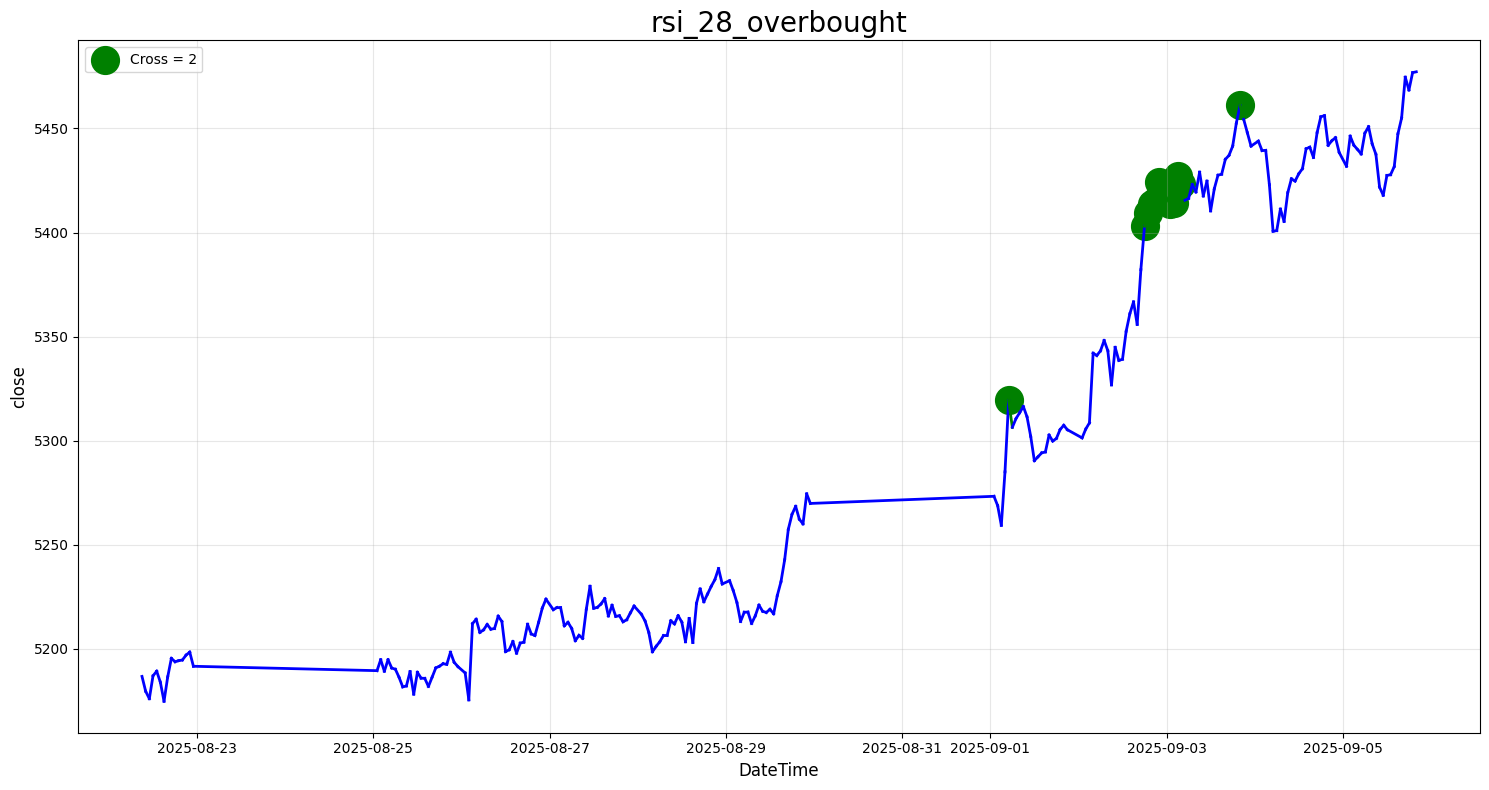

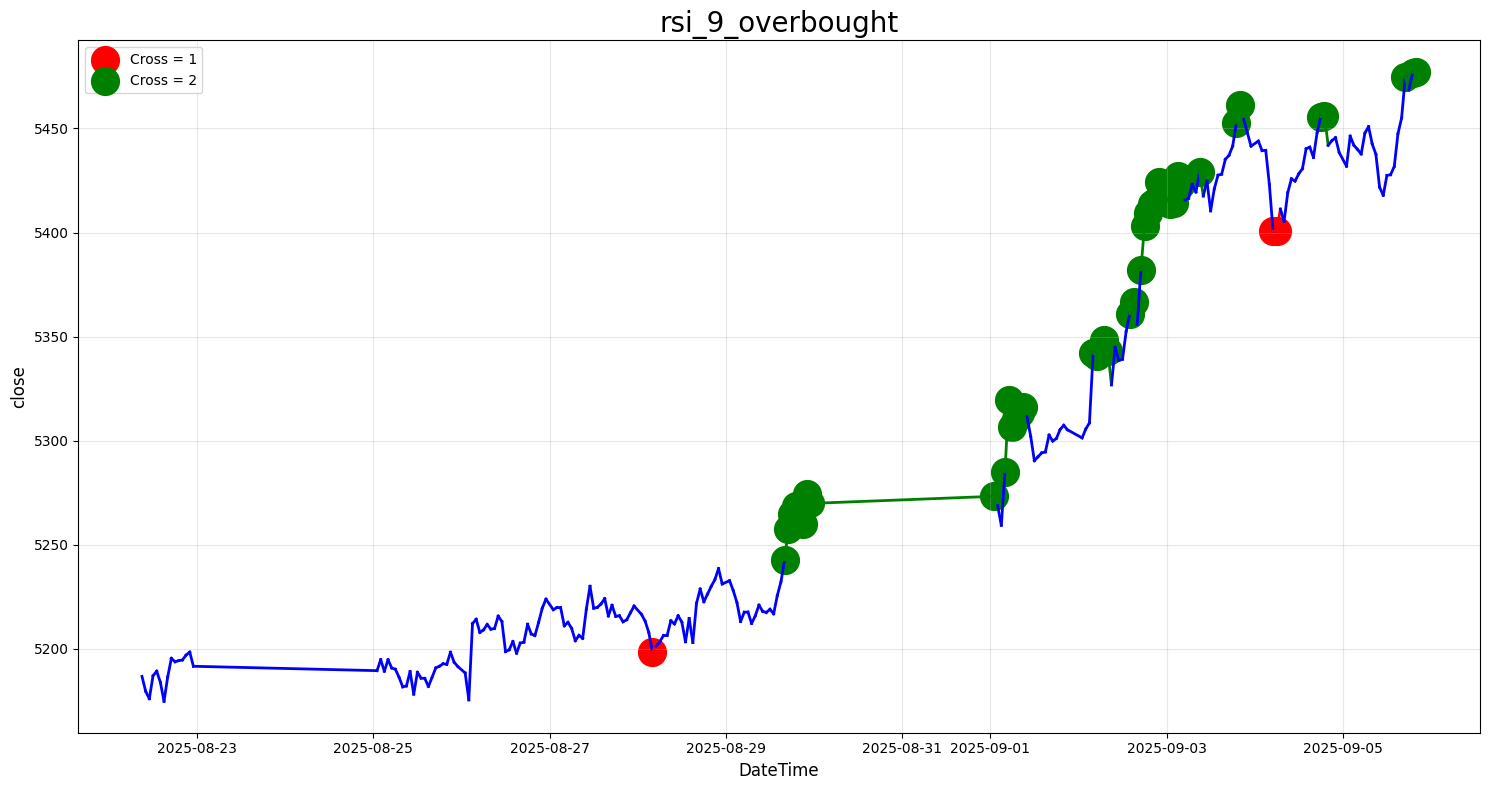

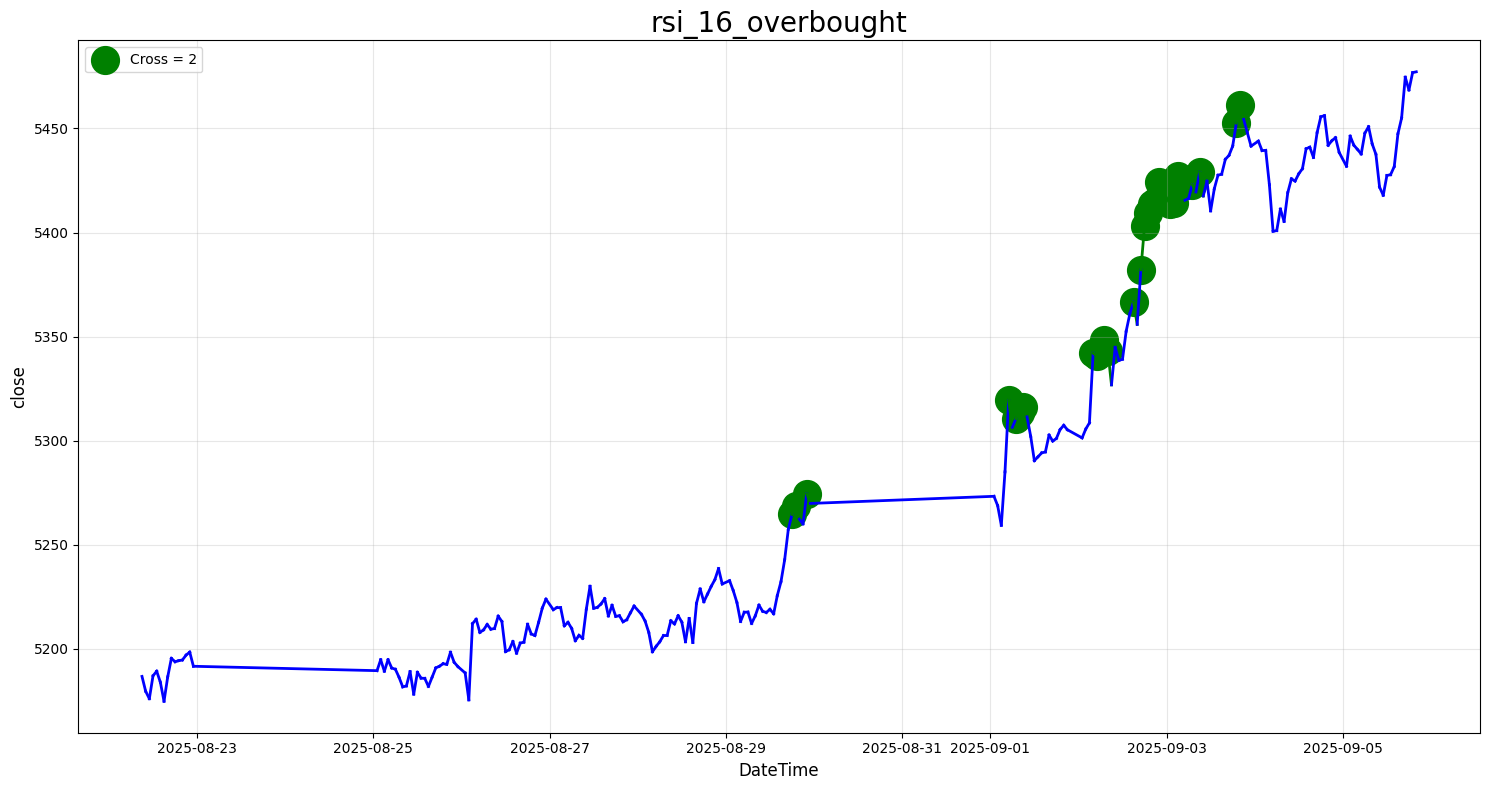

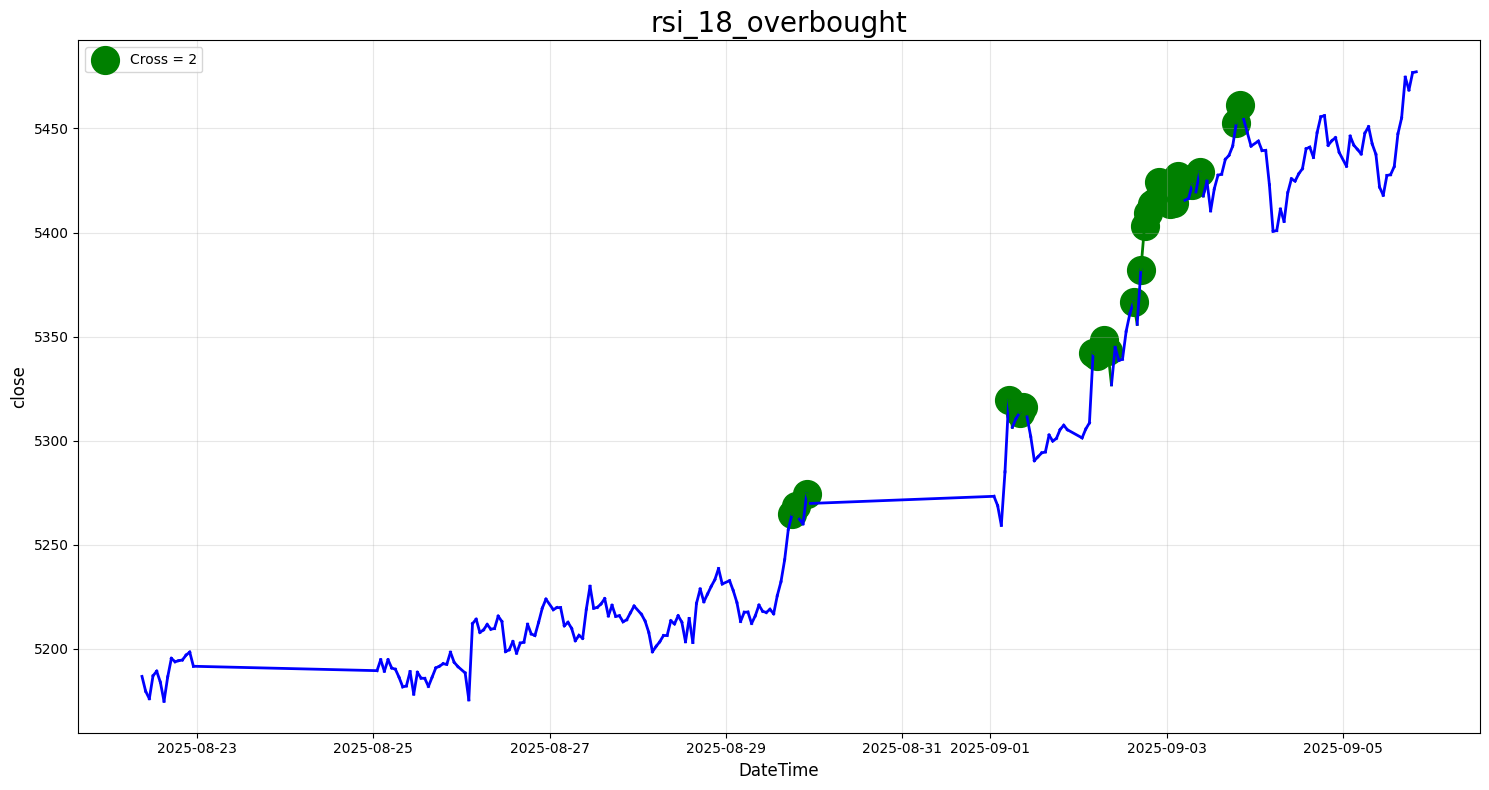

In [7]:
plotter = ForexPlotter(data = momentum_signals_data)
for subcol in signal_cols:
    plotter.plot_signals(periods = 240, cols = subcol)